In [1]:
#importing all the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#to view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 100
%matplotlib inline

In [2]:
application=pd.read_csv("application_data.csv")
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
col_df=pd.read_csv("columns_description.csv",encoding='unicode_escape')
col_df.sort_values('Row')

,Unnamed: 0,Table,Row,Description,Special
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN
125,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN
126,180,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the previous application,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
127,181,previous_application.csv,AMT_CREDIT,Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that...,NaN
128,182,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application,NaN
129,183,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if applicable) on the previous application,NaN
10,13,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
117,120,application_data,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one ...,NaN


#### Data understanding
Based on general understanding and research, below are potential factors/qualifiers that impact loan application status :
1. Loan amount
2. Loan type requested
3. Applicants financial standing (Car, Housing type, credit score etc)
4. Applicant liabilities (Family,children, employment type,Age)

We will analyze the data further to draw more inferences if these assumptions hold true

## Inspecting the data and null values

In [4]:
application.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#Days attribute needs to be corrected, as it is negative
#Max children count of 19 seems an anamoly, needs correction
#Traget variable seems skewed towards nondefaulters as 75% of the sample are non defaulters


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,104582.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307509.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,134133.00000,306851.00000,246546.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,151450.00000,127568.00000,157504.00000,103023.00000,92646.00000,143620.00000,152683.00000,154491.00000,98869.00000,124921.00000,97312.00000,153161.00000,93997.00000,137829.00000,159080.00000,306490.00000,306490.00000,306490.00000,306490.00000,307510.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,12.06109,1.00000,0.81989,0.19937,0.99813,0.28107,0.05672,2.15267,2.05246,2.03152,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.50213,0.51439,0.51085,0.11744,0.08844,0.97773,0.75247,0.04462,0.07894,0.14972,0.22628,0.23189,0.06633,0.10077,0.10740,0.00881,0.02836,0.11423,0.08754,0.97707,0.75964,0.04255,0.07449,0.14519,0.22232,0.22806,0.06496,0.10564,0.10598,0.00808,0.02702,0.11785,0.08795,0.97775,0.75575,0.04460,0.07808,0.14921,0.22590,0.23162,0.06717,0.10195,0.10861,0.00865,0.02824,0.10255,1.42225,0.14342,1.40529,0.10005,-962.85879,0.00004,0.71002,0.0

In [5]:
application.dtypes
#the datatypes of the attribute seems fine

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
previous=pd.read_csv("previous_application.csv")
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#define a function to show the null values in dataframe
def ChkNullPercent(df):
    return df.isnull().sum()/len(df)*100

In [8]:
print(ChkNullPercent(application)[ChkNullPercent(application)>45])
print(ChkNullPercent(previous)[ChkNullPercent(previous)>40])

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

### Only Keep columns with Minimum 55% of non-NaN Values

In [9]:
len(ChkNullPercent(application)[ChkNullPercent(application)>45])

49

In [10]:
#dropping columns with more than 45% null value in application & 0.4% in previous
application.dropna(thresh=0.55*len(application),axis=1,inplace=True)
previous.dropna(thresh=0.60*len(previous),axis=1,inplace=True)

### Inspecting other nullcolums

In [11]:
print(ChkNullPercent(application)[ChkNullPercent(application)>0].sort_values())
print(ChkNullPercent(previous)[ChkNullPercent(previous)>0].sort_values())




DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
OCCUPATION_TYPE               31.345545
dtype: float64
AMT_CREDIT              0.000060
PRODUCT_COMBINATION     0.020716
CNT_PAYMENT            22.286366
AMT_ANNUITY            22.286665
AMT_GOODS_PRICE        23.081773
dtype: float64


In [12]:
#inspecting the occupation type column
application[application.OCCUPATION_TYPE.isnull()].describe().apply(lambda s: s.apply('{0:.5f}'.format))
# For about 75% of the data the days employed has default value

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96334.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96143.00000,77283.00000,96066.00000,96066.00000,96066.00000,96066.00000,96390.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,96391.00000,83169.00000,83169.00000,83169.00000,83169.00000,83169.00000,83169.00000
mean,278090.62079,0.06513,0.22897,153516.03175,574329.73259,25609.16350,516977.38919,0.02122,-18826.30242,208785.28621,-5776.05158,-3409.12451,0.99999,0.42552,0.10461,0.99873,0.29189,0.04409,1.91603,2.05885,2.03890,11.79143,0.01163,0.02927,0.02357,0.05210,0.11988,0.09364,0.51174,0.53274,1.42397,0.14979,1.40745,0.10422,-939.24246,0.00001,0.59675,0.00009,0.01283,0.26274,0.00019,0.04263,0.00314,0.00001,0.00188,0.00000,0.00195,0.00231,0.00070,0.00554,0.00011,0.00416,0.00030,0.00022,0.00024,0.00632,0.00712,0.03537,0.24001,0.27704,1.99256
std,102717.54424,0.24676,0.57655,115028.63189,394137.29480,14092.98652,362099.65946,0.01421,4510.51093,181788.91310,3957.48609,1410.04835,0.00322,0.49442,0.30605,0.03555,0.45464,0.20530,0.78996,0.50919,0.50158,3.18317,0.10721,0.16855,0.15171,0.22223,0.32482,0.29133,0.19362,0.19074,2.35993,0.45122,2.34090,0.36623,823.14865,0.00322,0.49055,0.00966,0.11255,0.44013,0.01366,0.20202,0.05598,0.00322,0.04329,0.00000,0.04412,0.04804,0.02636,0.07422,0.01068,0.06437,0.01734,0.01476,0.01545,0.08313,0.11019,0.20857,0.86512,0.62610,1.96346
min,100011.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,45000.00000,0.00029,-25229.00000,-17546.00000,-24672.00000,-6383.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00053,0.00000,0.00000,0.00000,0.00000,-4153.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189114.50000,0.00000,0.00000,90000.00000,263686.50000,15502.50000,225000.00000,0.01003,-22404.00000,-1313.00000,-8817.00000,-4465.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,2.00000,2.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.38051,0.40141,0.00000,0.00000,0.00000,0.00000,-1544.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000

In [13]:
application.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307499.00000,307233.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307509.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,306851.00000,246546.00000,306490.00000,306490.00000,306490.00000,306490.00000,307510.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000,265992.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.57391,538396.20743,0.02087,-16036.99507,63815.04590,-4986.12033,-2994.20237,1.00000,0.81989,0.19937,0.99813,0.28107,0.05672,2.15267,2.05246,2.03152,12.06342,0.01514,0.05077,0.04066,0.07817,0.23045,0.17955,0.51439,0.51085,1.42225,0.14342,1.40529,0.10005,-962.85879,0.00004,0.71002,0.00008,0.01511,0.08806,0.00019,0.08138,0.00390,0.00002,0.00391,0.00001,0.00353,0.00294,0.00121,0.00993,0.00027,0.00813,0.00060,0.00051,0.00033,0.00640,0.00700,0.03436,0.26740,0.26547,1.89997
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.73732,369446.46054,0.01383,4363.98863,141275.76652,3522.88632,1509.45042,0.00180,0.38428,0.39953,0.04316,0.44952,0.23131,0.91068,0.50903,0.50274,3.26583,0.12213,0.21953,0.19750,0.26844,0.42112,0.38382,0.19106,0.19484,2.40099,0.44670,2.37980,0.36229,826.80849,0.00650,0.45375,0.00902,0.12201,0.28338,0.01385,0.27341,0.06229,0.00477,0.06242,0.00255,0.05927,0.05411,0.03476,0.09914,0.01633,0.08980,0.02439,0.02252,0.01830,0.08385,0.11076,0.20468,0.91600,0.79406,1.86929
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,0.00029,-25229.00000,-17912.00000,-24672.00000,-7197.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00053,0.00000,0.00000,0.00000,0.00000,-4292.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,0.01001,-19682.00000,-2760.00000,-7479.50000,-4299.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,2.00000,2.00000,2.00000,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.39246,0.37065,0.00000,0.00000,0.00000,0.00000,-1570.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.

In [14]:

application.OCCUPATION_TYPE.value_counts(normalize=True)
# Imputing with any aggregate function will completely bias the analysis as the missing data is more than the frequent (mode) value.
# so we will replace them with "Unknown" and update later based on bivariate analysis

OCCUPATION_TYPE
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: proportion, dtype: float64

In [15]:
application.OCCUPATION_TYPE.fillna("Unknown",inplace=True)

In [16]:
ChkNullPercent(application)[ChkNullPercent(application)>0].sort_values()
#At first glance the AMT_REQ*  and SOCIAL_CIRCLE attributes seem like Missing At Random (MAR) 
#as there seems to be a dependence between other such attribute. We will impute the missing values with median

DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
EXT_SOURCE_2                   0.214626
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
dtype: float64

In [17]:
#Inspecting EXT_SOURCE_3 & EXT_SOURCE_3
application[application.EXT_SOURCE_3.isnull()].describe()
#No outliers, and it looks like both are MCAR so we can either impute with any aggregate function or any cross validation methods.
# For my purpose, I will be imputing with median

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,60965.000000,60965.000000,60965.000000,6.096500e+04,6.096500e+04,60964.000000,6.089700e+04,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60964.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,6.073500e+04,0.0,60693.000000,60693.000000,60693.000000,60693.000000,60964.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.0,60965.000000,60965.0,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,60965.000000,19446.000000,19446.000000,19446.000000,19446.000000,19446.000000,19446.000000
mean,278127.476109,0.093119,0.387878,1.560016e+05,5.629870e+05,26873.045141,5.056143e+05,0.021270,-15652.140638,64671.976331,-4978.214877,-2764.024801,0.999984,0.818388,0.200197,0.998573,0.254162,0.050012,2.095778,2.046190,2.020602,11.885492,0.019159,0.058493,0.045157,0.092299,0.251866,0.190043,4.973853e-01,NaN,1.369598,0.139654,1.352001,0.099204,-835.274031,0.000213,0.694644,0.000082,0.015419,0.088592,0.000262,0.081539,0.004855,0.0,0.006184,0.0,0.002116,0.002050,0.000853,0.007677,0.000148,0.006512,0.000476,0.000098,0.000377,0.006428,0.008228,0.034300,0.162090,0.291320,1.950221
std,102653.923456,0.290602,0.702742,1.311654e+05,3.912061e+05,15129.021347,3.596630e+05,0.014365,4596.860957,141582.488353,3530.949259,1566.882736,0.004050,0.385528,0.400151,0.037750,0.435393,0.217972,0.905431,0.535406,0.525982,3.356821,0.137083,0.234674,0.207650,0.289450,0.434088,0.392338,1.980835e-01,NaN,2.311749,0.441165,2.289816,0.360229,786.593178,0.014601,0.460562,0.009056,0.123212,0.284156,0.016198,0.273663,0.069511,0.0,0.078395,0.0,0.045951,0.045235,0.029193,0.087280,0.012149,0.080434,0.021805,0.009920,0.019420,0.083074,0.113543,0.209583,0.529951,1.979461,1.986737
min,100003.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1993.500000,4.500000e+04,0.000533,-25229.000000,-16849.000000,-23738.000000,-6235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,NaN,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189616.000000,0.000000,0.000000,9.900000e+04,2.636865e+05,16087.500000,2.250000e+05,0.010032,-19501.000000,-2278.000000,-7466.000000,-4198.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.573422e-01,NaN,0.000000,0.000000,0.000

In [18]:
#Inspecting  AMT_ANNUITY
application[application.AMT_ANNUITY.isnull()]
#since number of rows are minimal , we can let it be as is

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.297087,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0

In [19]:
application[application.AMT_GOODS_PRICE.isnull()].NAME_CONTRACT_TYPE.value_counts()
#ALl missing records are for revolving loans, so we can impute using median AMT_GOOD_PRICE for all revolving loans


NAME_CONTRACT_TYPE
Revolving loans    278
Name: count, dtype: int64

In [20]:
#Imputing AMT_GOODS_PRICE with median
application.AMT_GOODS_PRICE.fillna(application[application.NAME_CONTRACT_TYPE=='Revolving loans'].AMT_GOODS_PRICE.median(),inplace=True)

In [21]:
ChkNullPercent(application)[ChkNullPercent(application)>0].sort_values()

DAYS_LAST_PHONE_CHANGE         0.000325
CNT_FAM_MEMBERS                0.000650
AMT_ANNUITY                    0.003902
EXT_SOURCE_2                   0.214626
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
NAME_TYPE_SUITE                0.420148
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
EXT_SOURCE_3                  19.825307
dtype: float64

In [22]:
#Inspecting CNT_FAM_MEMBERS
application[application.CNT_FAM_MEMBERS.isnull()]
# The NAME_TYPE_SUITE , NAME_FAMILY_STATUS,AMT_GOODS_PRICE are missing for the rows with null CNT_FAM_MEMBERS. 
# COuple of other attributes are also missing. It is better to delete these rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,270000.0,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.700618,NaN,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,270000.0,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.645168,0.670652,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
#Dropping rows with null CNT_FAM_MEMBERS
application.drop(application[application.CNT_FAM_MEMBERS.isnull()].index,inplace=True)

In [24]:
#inspect the NAME_TYPE_SUITE attribute
application[application.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,270000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,NaN,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,1,1,0,1,0,0,Unknown,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,0.756676,0.544235,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,-2179,1,1,0,1,1,0,Core staff,3.0,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.685813,0.528093,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,-4371,1,1,1,1,1,0,Unknown,2.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.492076,0.178760,2.0,0.0,2.0,0.0,-326.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306273,454852,0,Revolving loans,M,N,Y,2,67500.0,202500.0,10125.0,270000.0,NaN,Working,Higher education,Married,House / apartment,0.020713,-14079,-1648,-2492.0,-4905,1,1,1,1,1,0,Laborers,4.0,3,3,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.608328,NaN,0.0,0.0,0.0,0.0,-1154.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
306544,455158,0,Cash loans,F,N,N,0,180000.0,894825.0,23602.5,894825.0,NaN,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.026392,-19625,-1634,-12077.0,-721,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity

In [25]:
application.NAME_TYPE_SUITE.value_counts(normalize=True)
#most of the data value is skewed and since the null values are minimal we will replace with mode
application.NAME_TYPE_SUITE.fillna(application.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [26]:
ChkNullPercent(application)[ChkNullPercent(application)>0].sort_values()

DAYS_LAST_PHONE_CHANGE         0.000325
AMT_ANNUITY                    0.003902
EXT_SOURCE_2                   0.214628
OBS_30_CNT_SOCIAL_CIRCLE       0.332023
DEF_30_CNT_SOCIAL_CIRCLE       0.332023
OBS_60_CNT_SOCIAL_CIRCLE       0.332023
DEF_60_CNT_SOCIAL_CIRCLE       0.332023
AMT_REQ_CREDIT_BUREAU_HOUR    13.501393
AMT_REQ_CREDIT_BUREAU_DAY     13.501393
AMT_REQ_CREDIT_BUREAU_WEEK    13.501393
AMT_REQ_CREDIT_BUREAU_MON     13.501393
AMT_REQ_CREDIT_BUREAU_QRT     13.501393
AMT_REQ_CREDIT_BUREAU_YEAR    13.501393
EXT_SOURCE_3                  19.825111
dtype: float64

In [27]:
# Imputing all other null attributes with null percent >0.2  with median and we are leaving the other nulls as they are very minimal
MARColumns=ChkNullPercent(application)[ChkNullPercent(application)>0.2].index
for i in MARColumns:
    application[i].fillna(application[i].median(),inplace=True)


In [28]:
#columns with less nulls are left untreated as it might not impact much
ChkNullPercent(application)[ChkNullPercent(application)>0].sort_values()

DAYS_LAST_PHONE_CHANGE    0.000325
AMT_ANNUITY               0.003902
dtype: float64

#### Check the data integrity , like data format, data type are correct or not

In [29]:
#Inspecting the days attributes (which have negatives)
dayscols=application.columns[application.columns.str.contains("DAYS")]
application[dayscols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307509.000000,307509.000000,307509.000000,307509.000000,307508.000000
mean,-16037.017291,63815.465479,-4986.136946,-2994.202140,-962.860075
std,4363.994085,141276.130137,3522.891109,1509.450739,826.810973
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7480.000000,-4299.000000,-1570.000000
50%,-15750.000000,-1214.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [30]:
#Going by upper limit of average life span of 90 years, there seem to be some outliers over 90 years. Inspecting the values in details
print(application[application["DAYS_EMPLOYED"]>32850].NAME_INCOME_TYPE.value_counts())
print(application[application["DAYS_EMPLOYED"]>32850].DAYS_EMPLOYED.value_counts())
#By further inspection , looks like these are the people who are unemployed 
print(len(application[application["DAYS_EMPLOYED"]>32850])/len(application)*100)

# 18% of the records ahve outliers and ignoring the records might impact our analysis. Since we know they are unemployed, we will impute 
#DAYS_EMPLOYED with 0 for these records
application.DAYS_EMPLOYED=application["DAYS_EMPLOYED"].apply(lambda x: x if x<32850 else 0)
print(len(application[application["DAYS_EMPLOYED"]>32850])/len(application)*100)

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64
DAYS_EMPLOYED
365243    55374
Name: count, dtype: int64
18.00727783577066
0.0


In [31]:
# Converting the days to years and to positive value
for col in dayscols:
    colpart='YEARS_'+ col.split('DAYS_')[1]
    if application[col].max()<=0 and application[col].min()<0:
        application[colpart]=application[col].apply(lambda x: x*-1/365 if x<=0 else x/365)
application[dayscols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307509.000000,307509.000000,307509.000000,307509.000000,307508.000000
mean,-16037.017291,-1954.856307,-4986.136946,-2994.202140,-962.860075
std,4363.994085,2307.073863,3522.891109,1509.450739,826.810973
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7480.000000,-4299.000000,-1570.000000
50%,-15750.000000,-1214.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
application.drop(columns=dayscols,inplace=True)

In [33]:
#Renaming YEARS_BIRTH to AGE for clarity
application.rename(columns={'YEARS_BIRTH':'AGE'},inplace=True)
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUM

In [34]:
application.dtypes


SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT     

In [35]:
application.ORGANIZATION_TYPE.dtype=='O'

True

In [36]:
#we will convert the numeric attributes to object type for attributes with less than 20 unique values
cols=application.dtypes.index
numericcols=[]
categoricalcols=[]
for i in cols:
    uniquevalue=len(application[i].value_counts())
    if uniquevalue<=20 or application[i].dtype=='O' :
        categoricalcols.append(i)
    else:
        numericcols.append(i)
print(numericcols)
print(categoricalcols)

        

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE']
['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'D

In [37]:
#Converting the categorical columns to object datatype:
for col in categoricalcols:
    application.loc[:, col] = application.loc[:, col].astype(object)
application.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307509 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307509 non-null  int64  
 1   TARGET                       307509 non-null  object 
 2   NAME_CONTRACT_TYPE           307509 non-null  object 
 3   CODE_GENDER                  307509 non-null  object 
 4   FLAG_OWN_CAR                 307509 non-null  object 
 5   FLAG_OWN_REALTY              307509 non-null  object 
 6   CNT_CHILDREN                 307509 non-null  object 
 7   AMT_INCOME_TOTAL             307509 non-null  float64
 8   AMT_CREDIT                   307509 non-null  float64
 9   AMT_ANNUITY                  307497 non-null  float64
 10  AMT_GOODS_PRICE              307509 non-null  float64
 11  NAME_TYPE_SUITE              307509 non-null  object 
 12  NAME_INCOME_TYPE             307509 non-null  object 
 13  NAME

### Checking outliers in some our variables

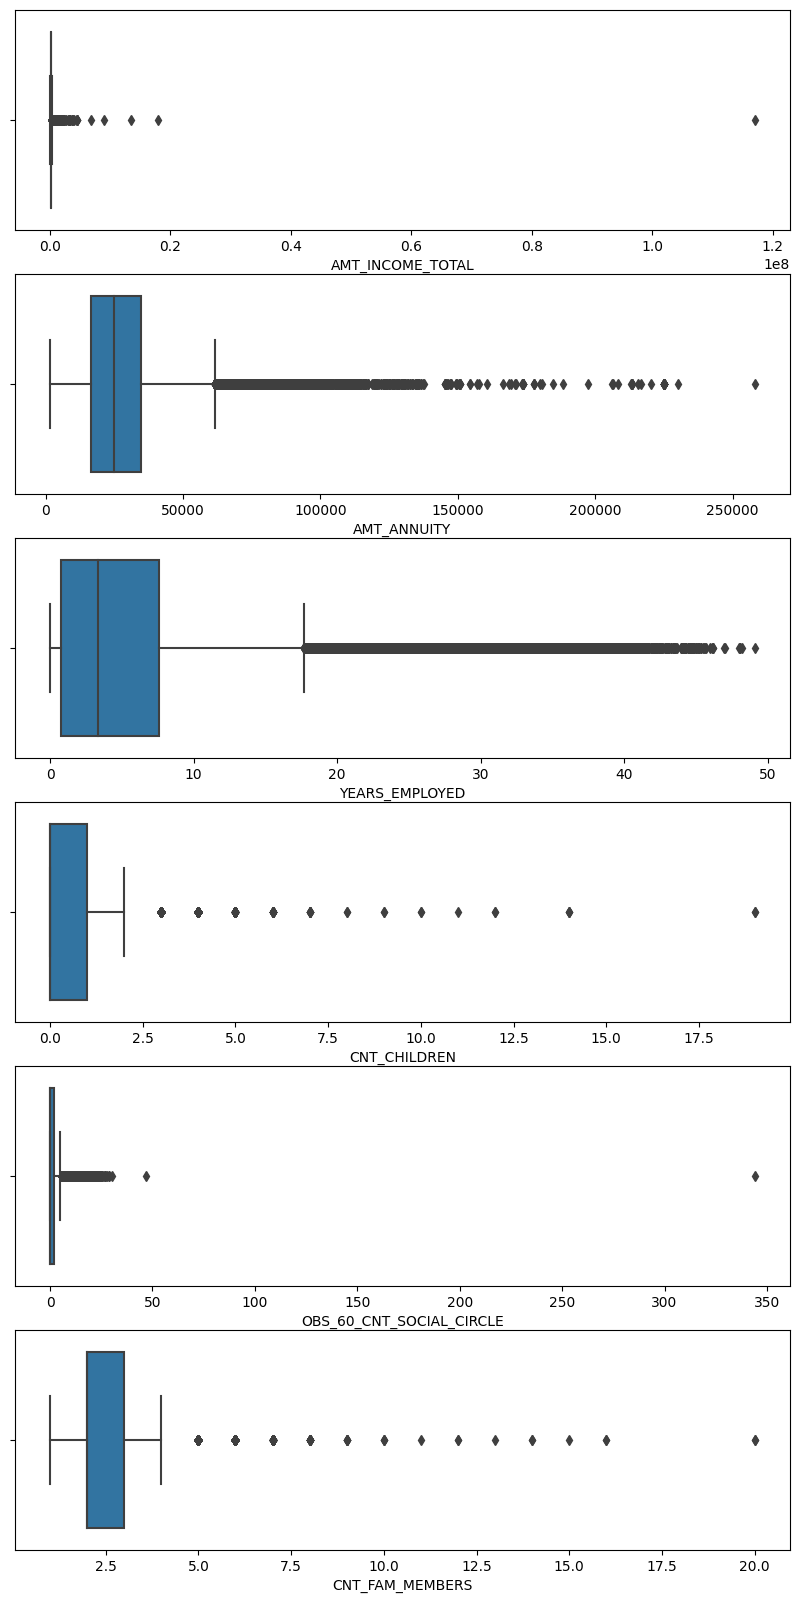

In [38]:
plt.figure(figsize=(10,20))
plt.subplot(6,1,1)
sns.boxplot(x=application.AMT_INCOME_TOTAL)
#Evidently there are a few outliers in high salaried clients

plt.subplot(6,1,2)
sns.boxplot(x=application.AMT_ANNUITY)
# The attribute is dependant on the income of the client. 
# The higher income groups are causing the outliers as they are less in number with higher annuity

plt.subplot(6,1,3)
sns.boxplot(x=application.YEARS_EMPLOYED)
# Most of the clients are the ones who took a loan after starting a new job
# We have outlier with value 365423 in multiple attributes- this seems like a filling number for missing value/NA
# The other outliers are clients with a stable job but lesser average salary

plt.subplot(6,1,4)
sns.boxplot(x=application.CNT_CHILDREN)
#Per the https://www.nationmaster.com/country-info/stats/People/Total-fertility-rate#-amount, 
#the max average children per family for a country is 5 . So there should have been a typo

plt.subplot(6,1,5)
sns.boxplot(x=application.OBS_60_CNT_SOCIAL_CIRCLE)


plt.subplot(6,1,6)
sns.boxplot(x=application.CNT_FAM_MEMBERS)
plt.show()
# 2 outliers
# But the validity of the data itself is not good enough as most of the clients do not have any observations recorded

#### Observations:
1.Outliers in income is expected, we can bin the salaries in ranges for ease of analysis
2. We can also see many outliers in AMT_annuity, we can analyze further based on bivariate/multivariate analysis
3.Most of the data seems to be of people with <10 years experience, but we also have data of highly experienced people which is an outlier but not an anomoly
4. Outliers in children count seems to be an anomoly as even by reasonable standards , children >5 seems odd. So we need to handle this data
5.There are 2 outliers in OBS_60_CNT_SOCIAL_CIRCLE
6. There are many outliers in family members count, count of 10+ seems odd even for joint families so we can bin them 10+

In [39]:
#outliers in children count:
print(len(application[application.CNT_CHILDREN>5]))
#since the outliers are minimum we will update to np.nan so this value is ignored in our analysis
application.CNT_CHILDREN=application.CNT_CHILDREN.apply(lambda x: np.nan if x>5 else x)

print('Updated the anomolies in children count to np.nan')

42
Updated the anomolies in children count to np.nan


#### Binnign continuous variable

In [40]:
#Outliers in family members- Bucket the ranges
application.CNT_FAM_MEMBERS=application.CNT_FAM_MEMBERS.apply(lambda x: x if x <9 else '9+')
print(application.CNT_FAM_MEMBERS.value_counts())

CNT_FAM_MEMBERS
2.0    158357
1.0     67847
3.0     52601
4.0     24697
5.0      3478
6.0       408
7.0        81
9+         20
8.0        20
Name: count, dtype: int64


In [41]:
#Creating binned var
#Selecting the buckets based on the quartiles to standardize the binning
application.loc[:,'INCOME_RANGE']=pd.qcut(application.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.25,0.50,0.75,0.90,1],
labels=['Very Low','Low','Medium','High','Very High'])
print(application.INCOME_RANGE)
application.loc[:,'Ext_Rating_3']=pd.qcut(application.loc[:,'EXT_SOURCE_3'],q=[0,0.25,0.50,0.75,0.90,1],
labels=['Very Low','Low','Medium','High','Very High'])
print(application.Ext_Rating_3)
application['AGE_GROUP']= pd.cut(application.AGE,bins=np.linspace(20 ,70,num=6))
print(application.AGE_GROUP)

0           Medium
1             High
2         Very Low
3              Low
4              Low
            ...   
307506      Medium
307507    Very Low
307508      Medium
307509      Medium
307510      Medium
Name: INCOME_RANGE, Length: 307509, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']
0         Very Low
1              Low
2             High
3              Low
4              Low
            ...   
307506         Low
307507         Low
307508    Very Low
307509        High
307510    Very Low
Name: Ext_Rating_3, Length: 307509, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']
0         (20.0, 30.0]
1         (40.0, 50.0]
2         (50.0, 60.0]
3         (50.0, 60.0]
4         (50.0, 60.0]
              ...     
307506    (20.0, 30.0]
307507    (50.0, 60.0]
307508    (40.0, 50.0]
307509    (30.0, 40.0]
307510    (40.0, 50.0]
Name: AGE_GROUP, Length: 307509, dtype: category
Categories (5, int

### With this we complete cleaning up the data. We will now proceed with univariate, bivariate and multivariate analysis

###   Check the Imbalance percentage. 

Imbalance %:
  TARGET
0    92.0
1     8.0
Name: proportion, dtype: float64 2


Text(0.5, 1.0, 'Data imbalance')

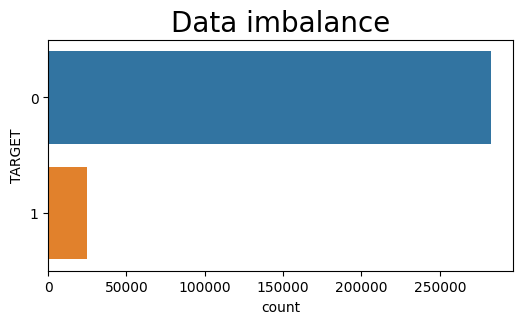

In [42]:
print("Imbalance %:\n ",round(application.TARGET.value_counts(normalize=True)*100),2)
# Target0=92%
# Target1=8%
plt.figure(figsize=(6,3))
sns.countplot(y='TARGET',data=application)
plt.title('Data imbalance',fontsize=20)

## Univariate analysis

#### Univariate analysis for categorical variables

In [43]:
# function to plot for categorical variables
def Cntplots(var):
    
    sns.countplot(x=var, data=application)
    plt.title('Distribution of '+ '%s' %var, fontsize=18)
    plt.xlabel(var,fontsize=16)
    plt.xticks(rotation=90)
    plt.ylabel('Total Applicants',fontsize=16)
    
    

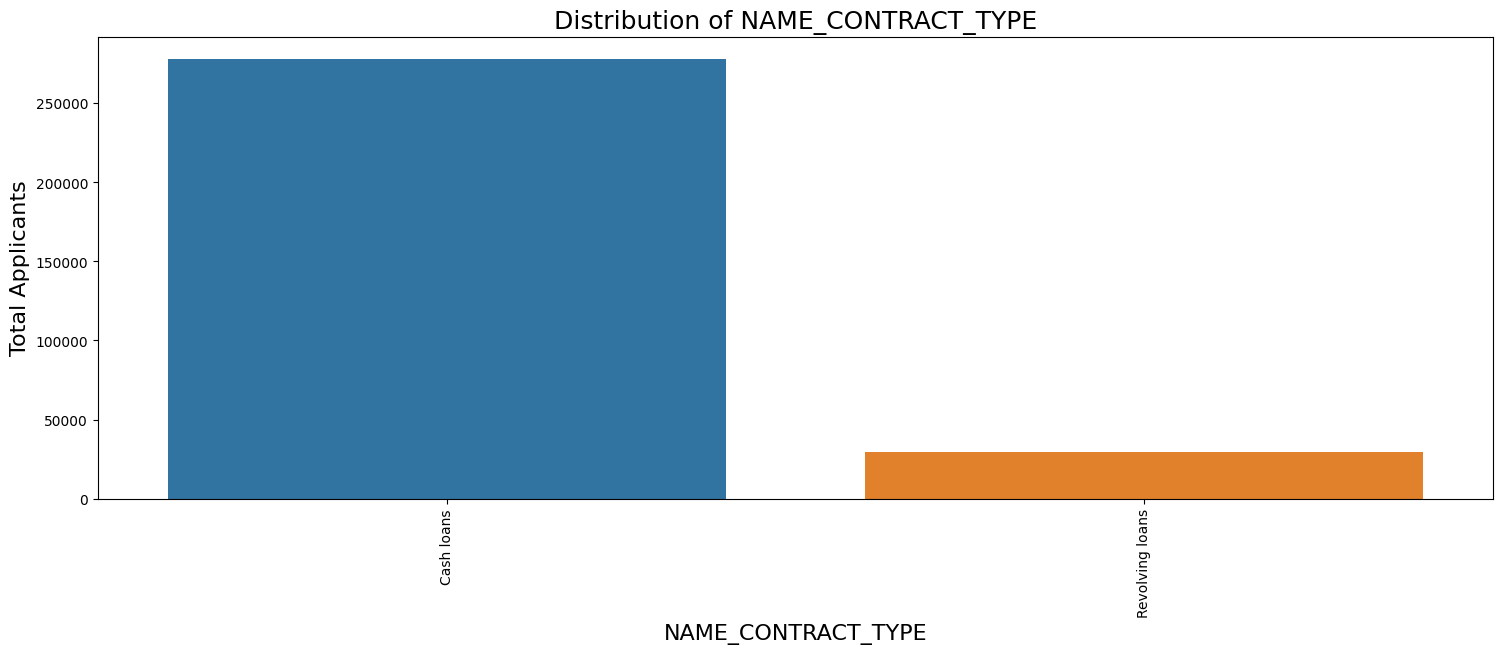

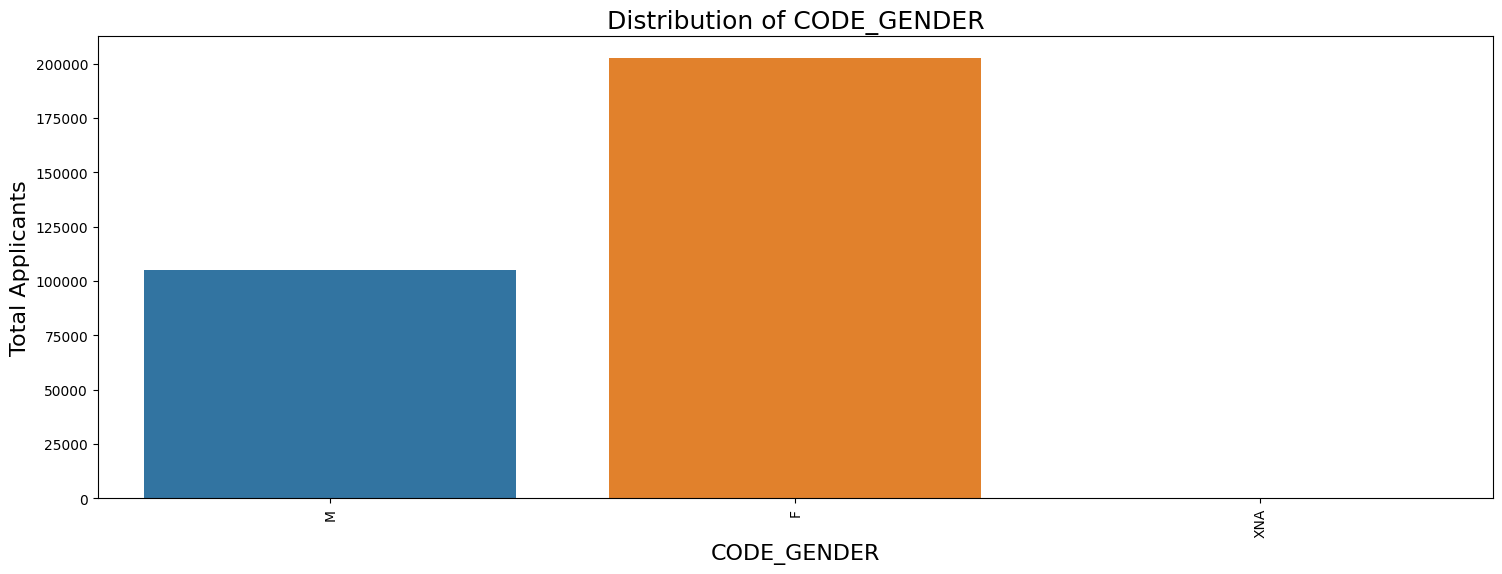

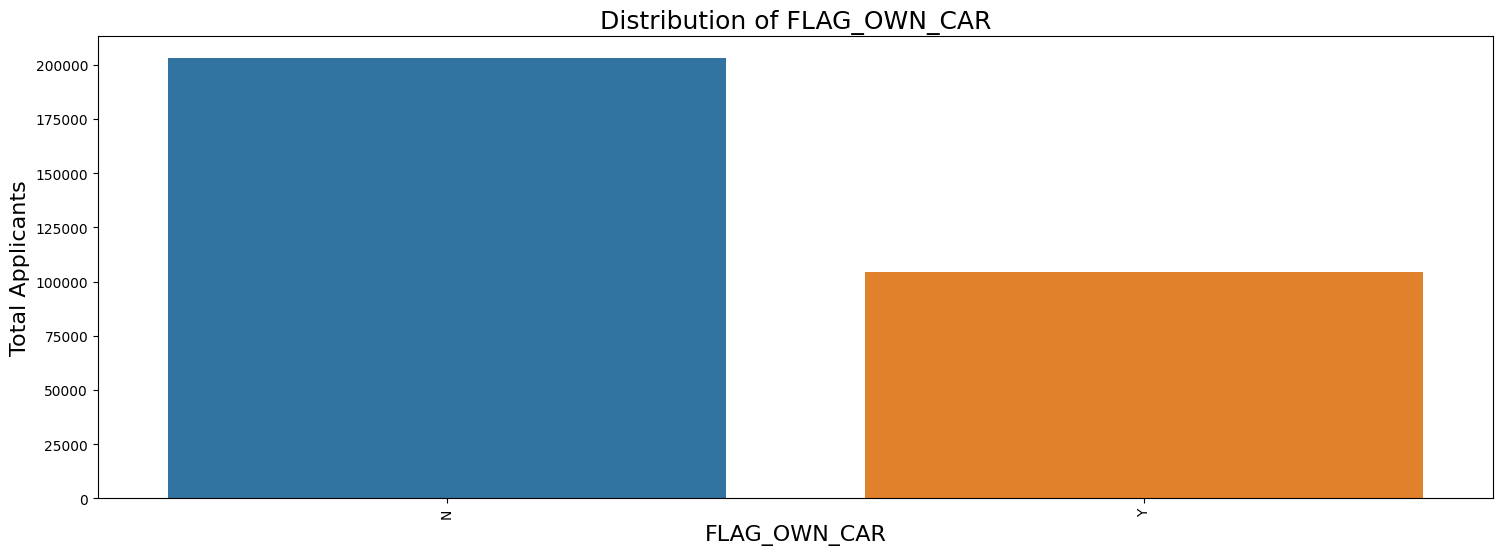

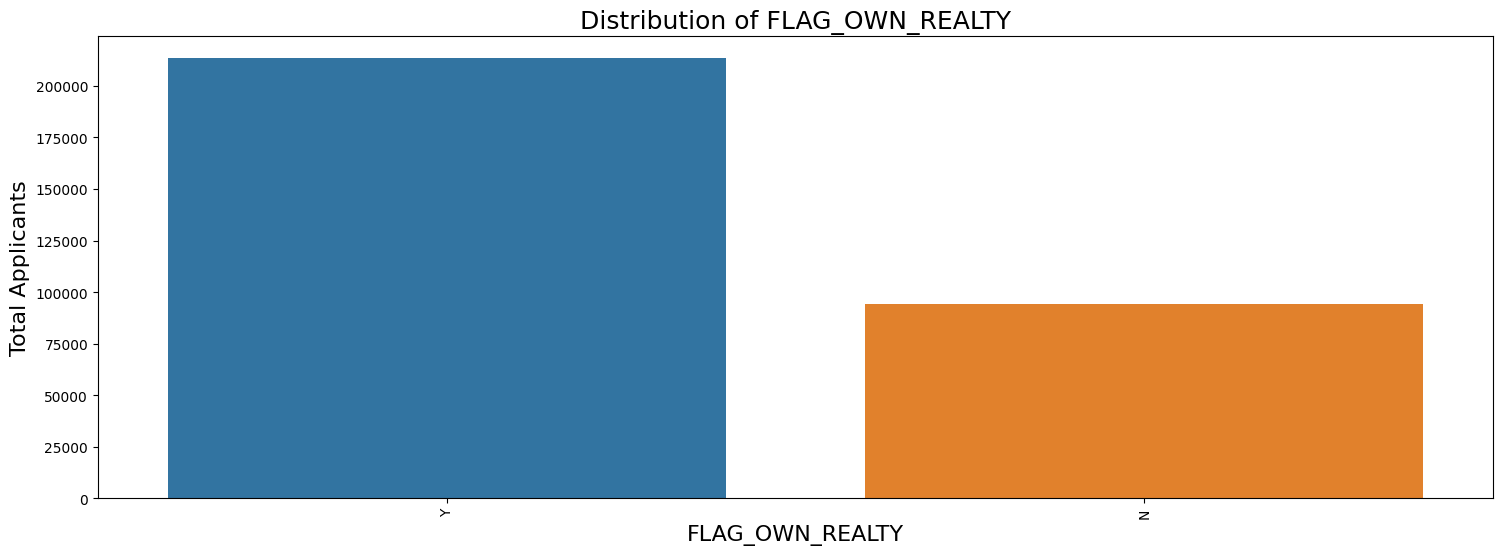

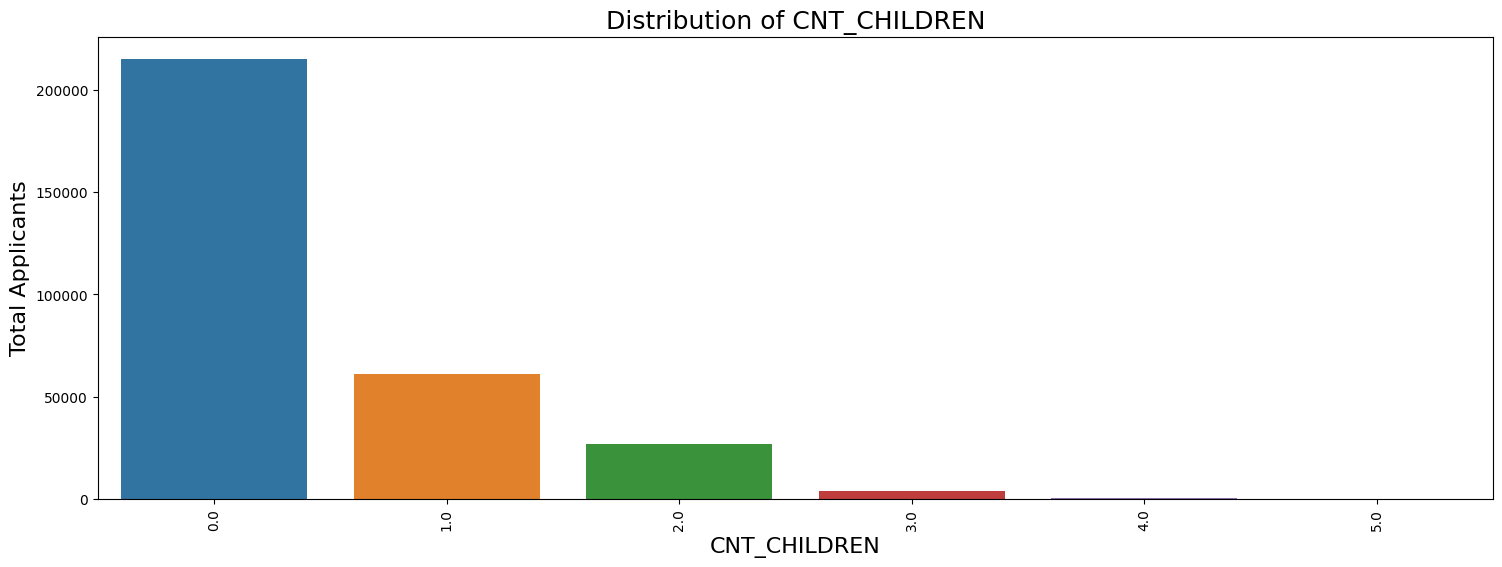

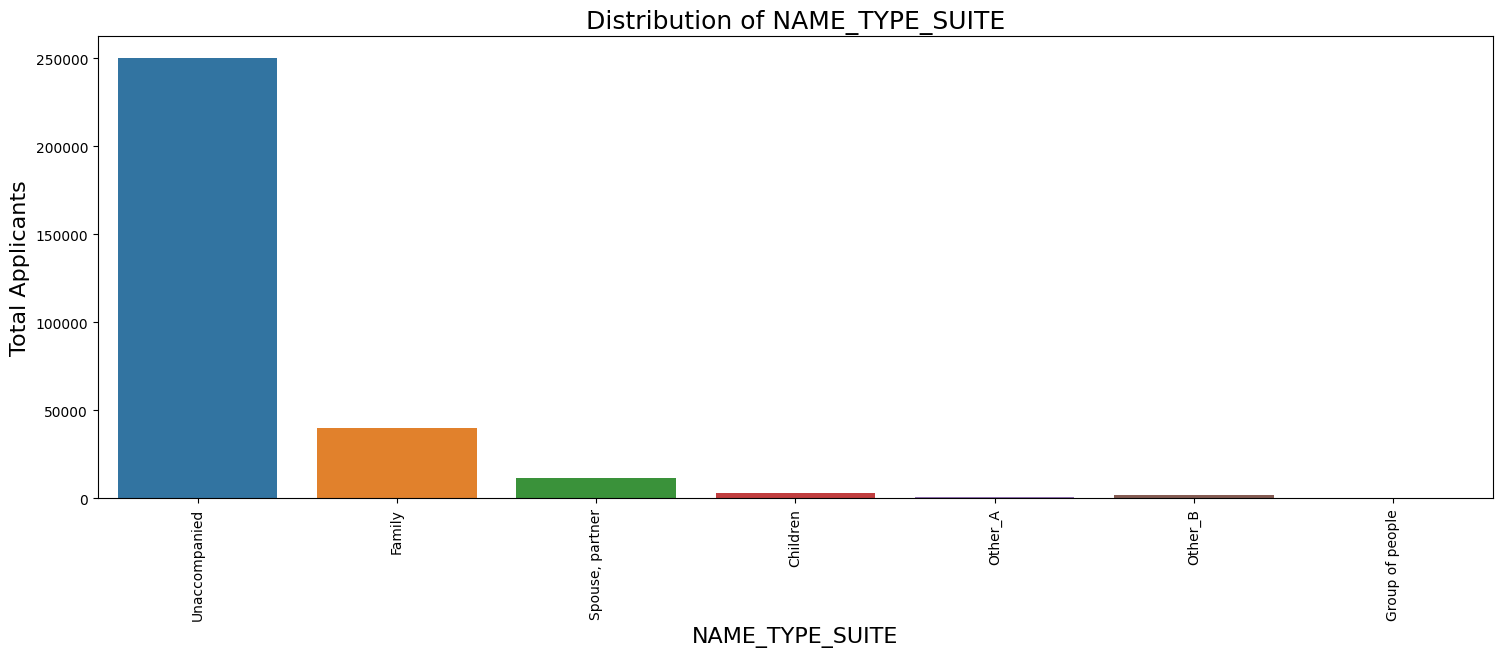

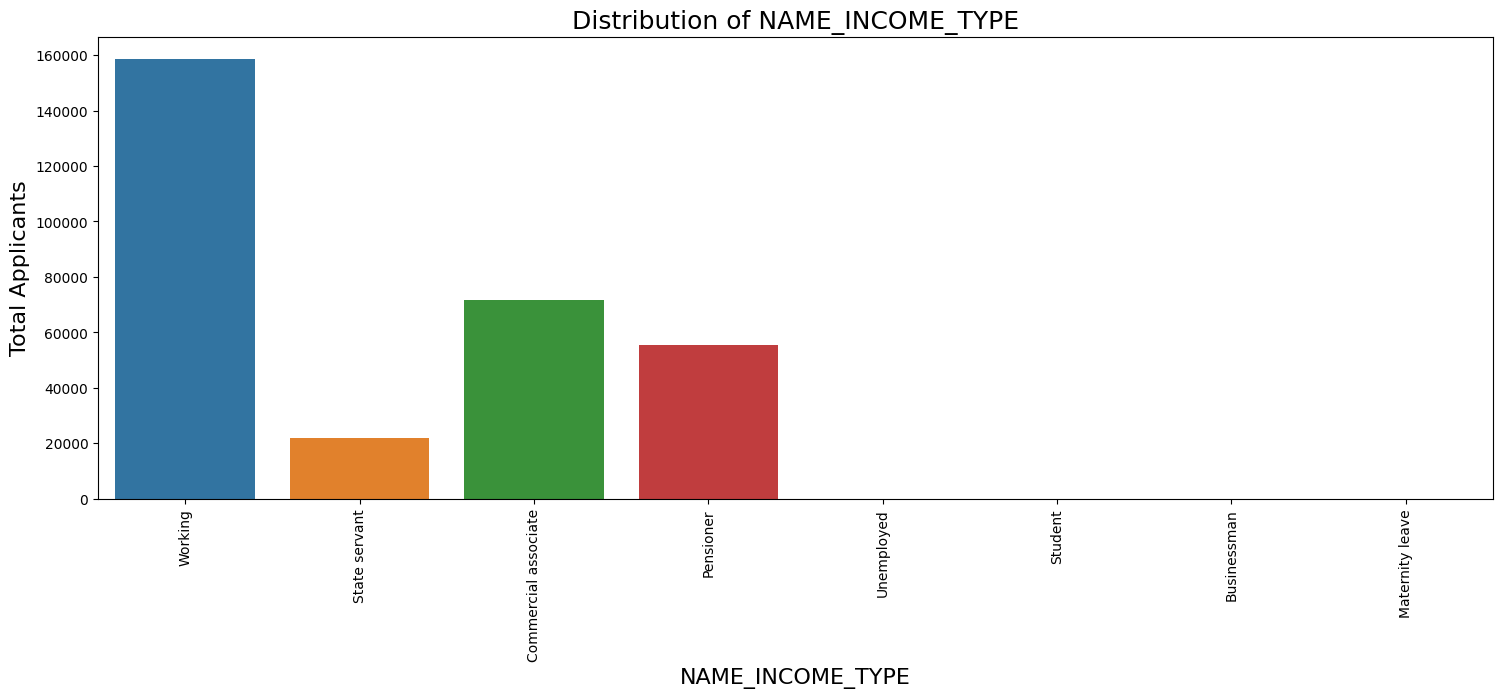

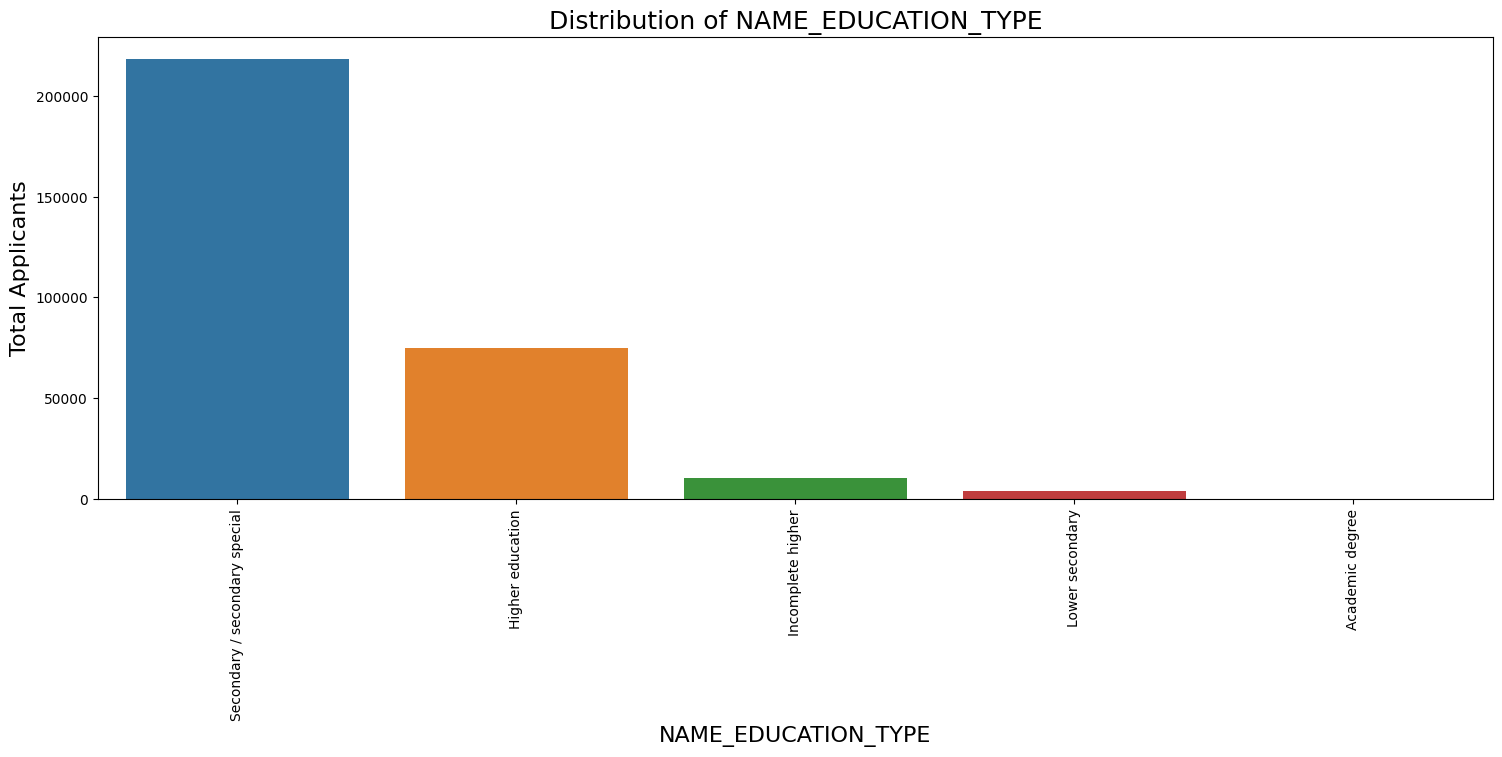

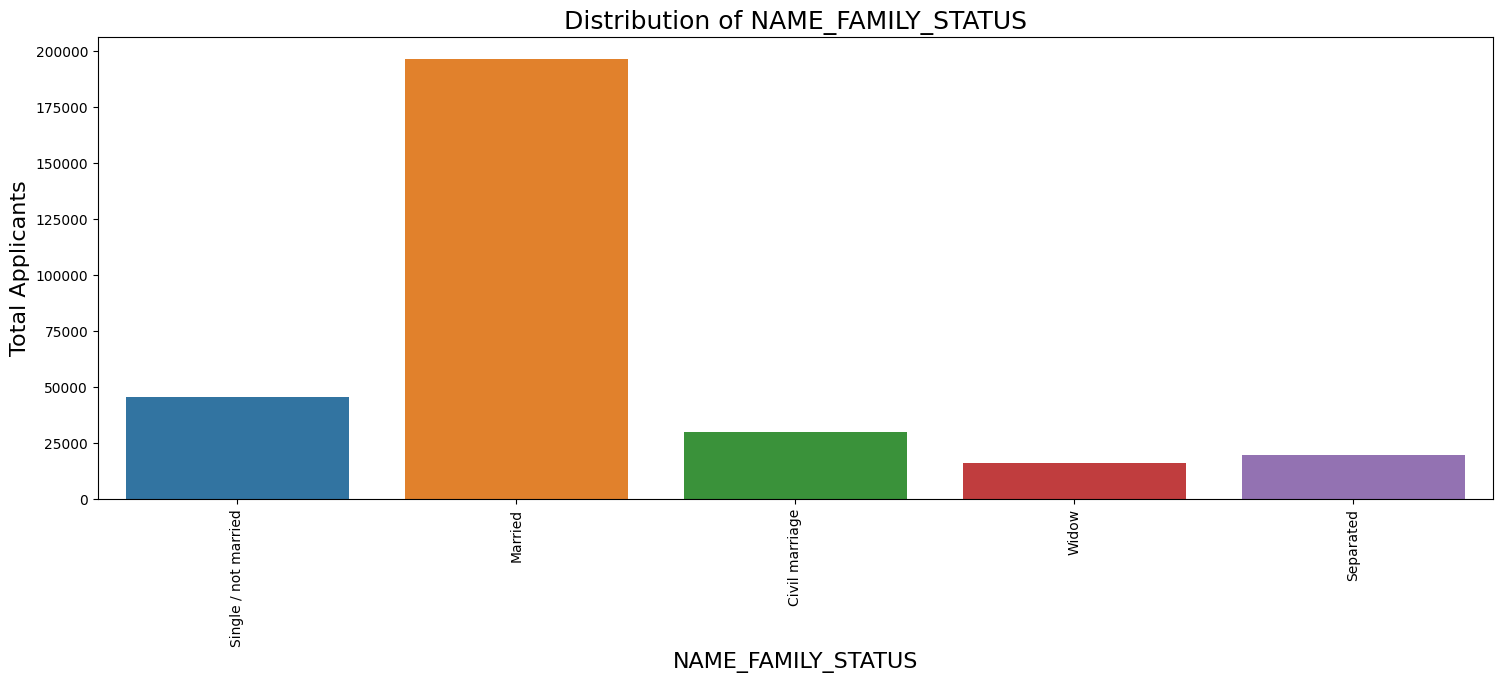

In [44]:
#Plotting the distribution of some of the categorical variables in the application data
j=0
for i in categoricalcols[1:10]:
    j=j+1
    plt.figure(i,figsize=(18,6))
    #plt.subplot(7,1,j)
    Cntplots(i)
    plt.show()
#More than 50% of the applicants own reality
#Majority of the applicants do not have children and came unaccompanied
# Businessmen, New moms, students and unbemployed applicants form the minority in the data, majority being the working professional

#### Univariate analysis for numerical variables

In [45]:
def Boxplots(var):
    
    sns.boxplot(x=var, data=application)
    plt.title('Distribution of '+ '%s' %var, fontsize=18)
    plt.xlabel(var,fontsize=16)
    plt.xticks(rotation=90)
    plt.ylabel('Total Applicants',fontsize=16)

In [46]:
application[numericcols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 307509 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307509 non-null  int64  
 1   AMT_INCOME_TOTAL            307509 non-null  float64
 2   AMT_CREDIT                  307509 non-null  float64
 3   AMT_ANNUITY                 307497 non-null  float64
 4   AMT_GOODS_PRICE             307509 non-null  float64
 5   REGION_POPULATION_RELATIVE  307509 non-null  float64
 6   HOUR_APPR_PROCESS_START     307509 non-null  int64  
 7   EXT_SOURCE_2                307509 non-null  float64
 8   EXT_SOURCE_3                307509 non-null  float64
 9   OBS_30_CNT_SOCIAL_CIRCLE    307509 non-null  float64
 10  OBS_60_CNT_SOCIAL_CIRCLE    307509 non-null  float64
 11  AMT_REQ_CREDIT_BUREAU_MON   307509 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_YEAR  307509 non-null  float64
 13  AGE                

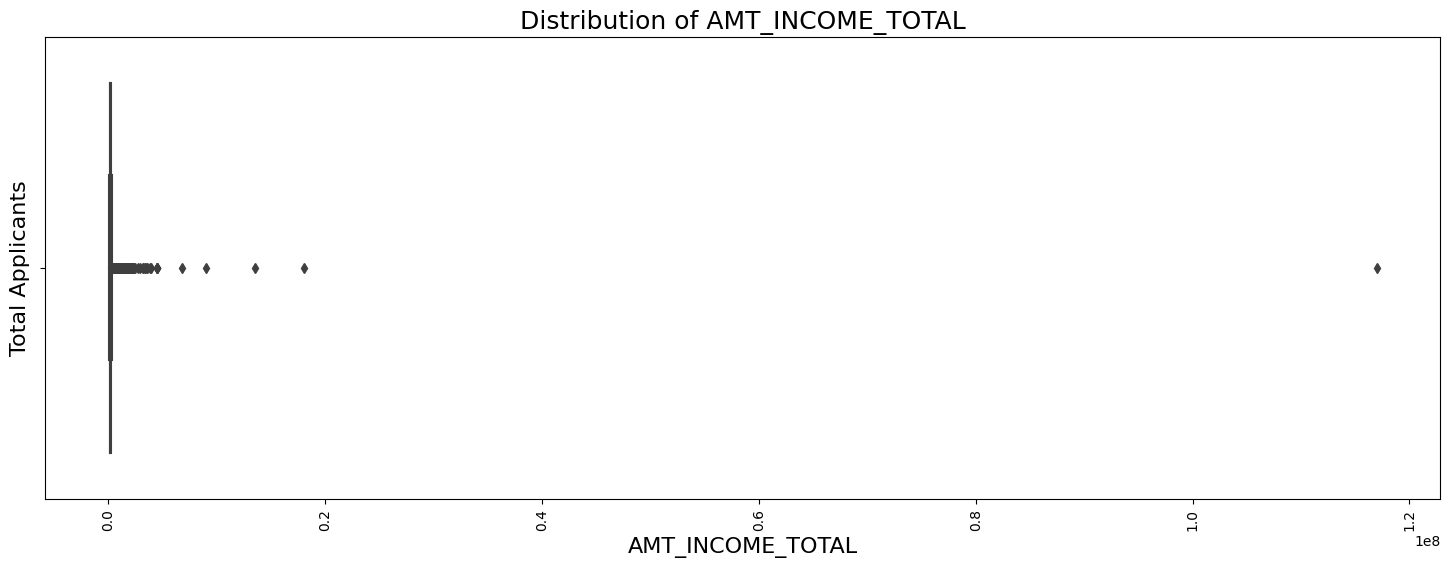

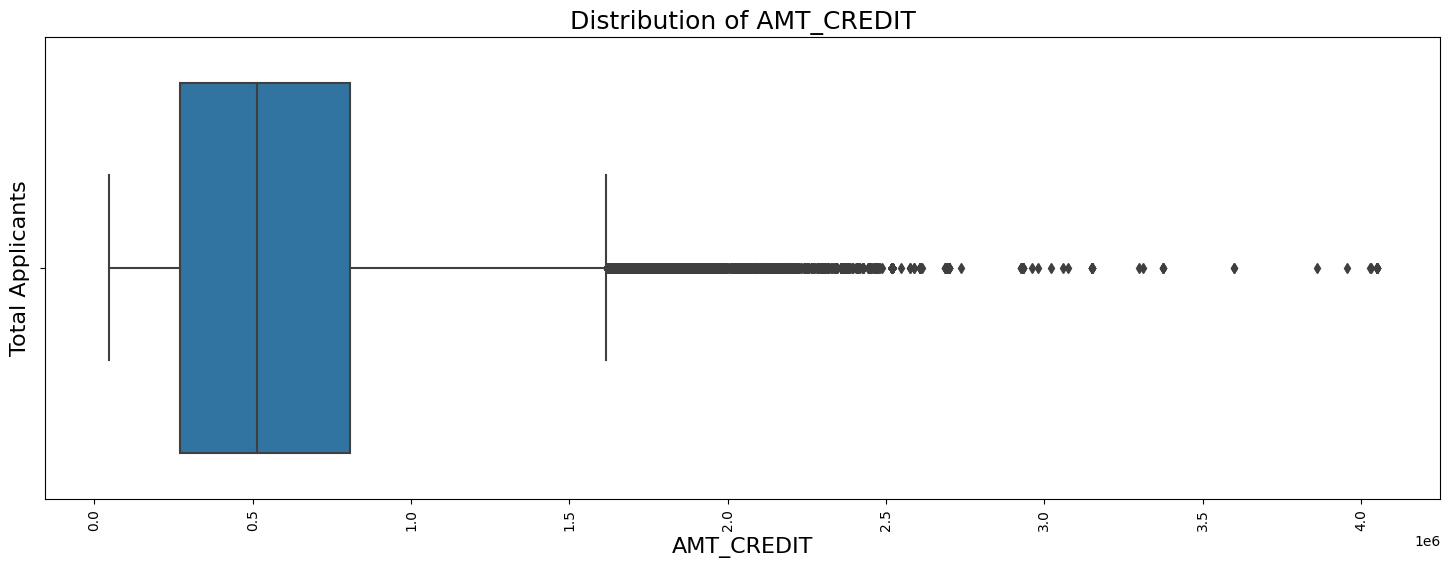

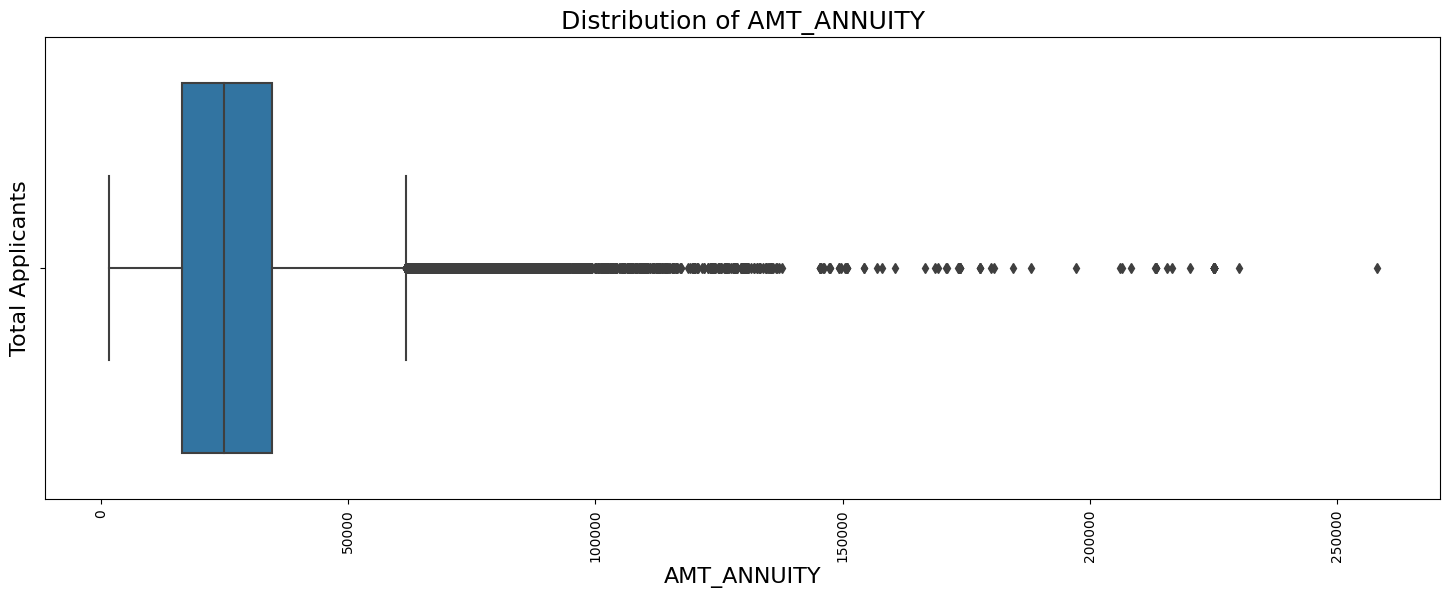

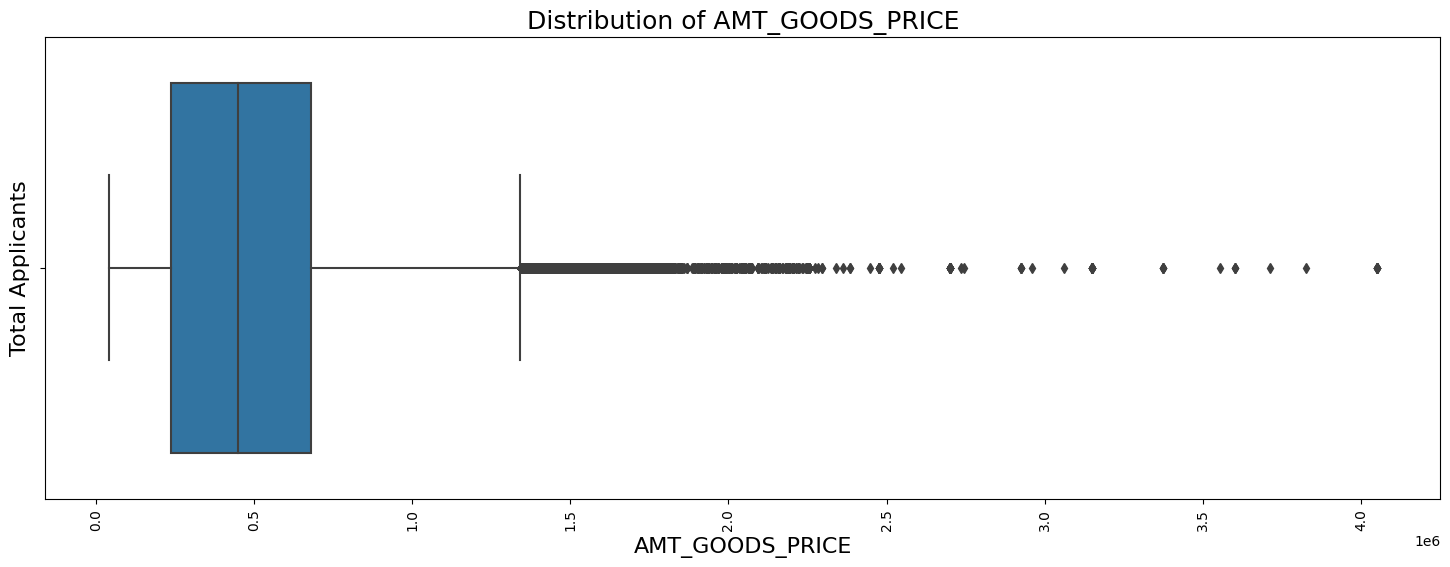

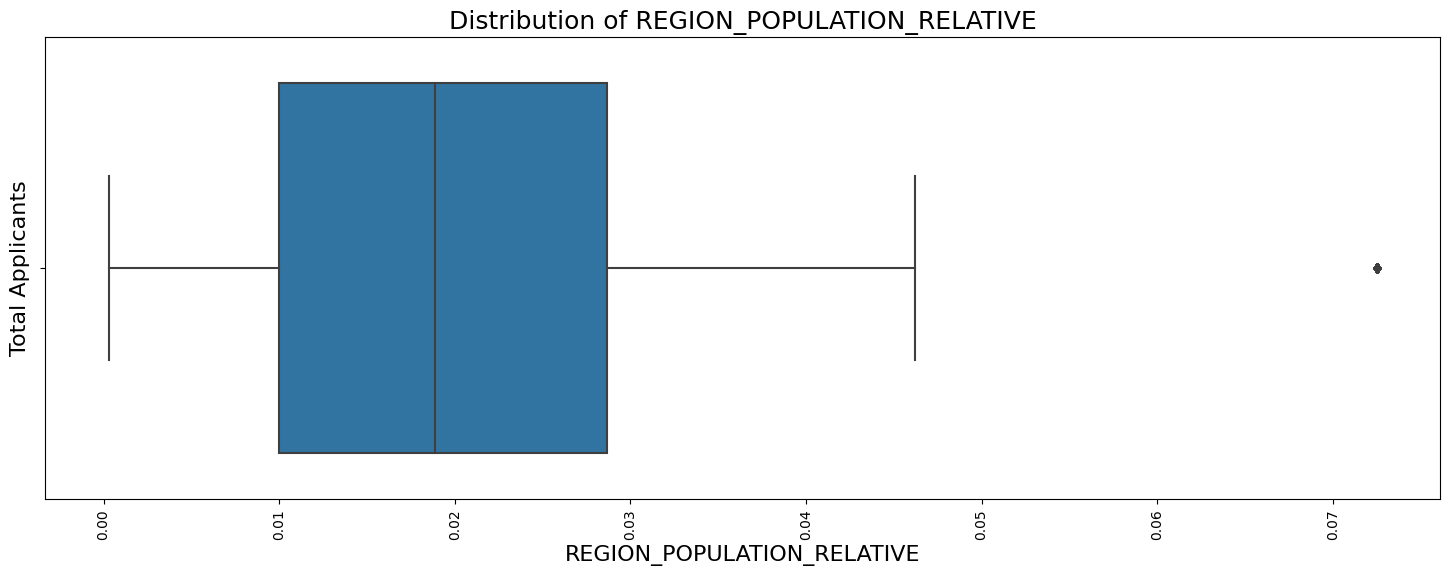

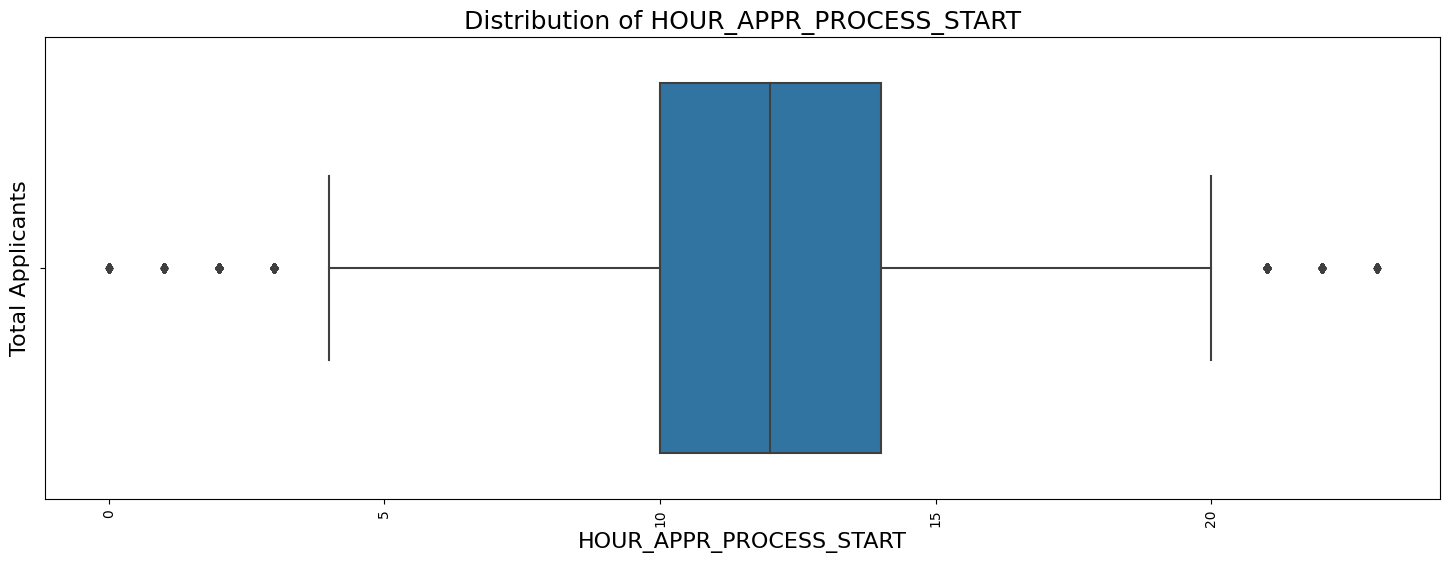

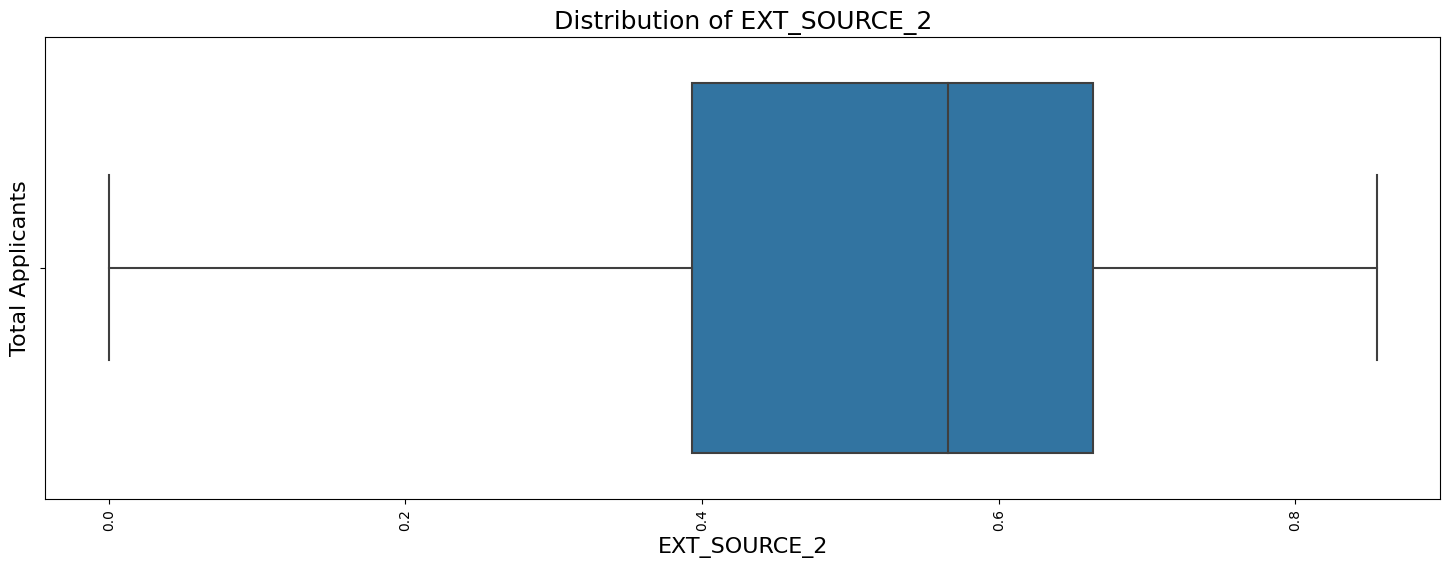

In [47]:
#Plotting the distribution of some of the categorical variables in the application data
j=0
for i in numericcols[1:8]:
    j=j+1
    plt.figure(i,figsize=(18,6))
    #plt.subplot(7,1,j)
    Boxplots(i)
    plt.show()
# Clear outliers in AMT_INCOME of the applicants & AMT_CREDIT
# EXT_SOURCE_@ rating does not have any outliers and majority of the data is rated below 0.5
#Most the applications are started between 10th-15th hour which makes sense as it is regular working hours.There are some outliers
#probably who reached out outside working hours for any urgency

<Axes: xlabel='AMT_CREDIT'>

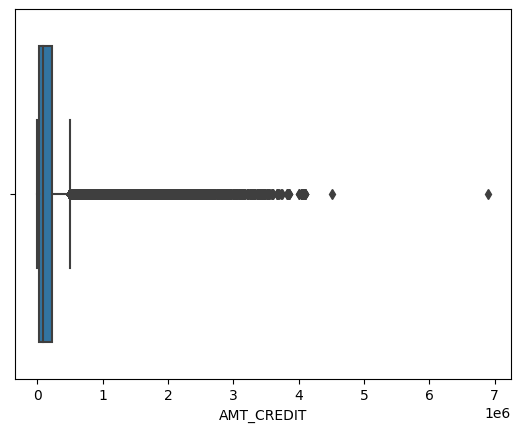

In [48]:
#For prev_app_Data only 2 columns have nulls around 13%
# PRODUCT_COMBINATION & AMT_CREDIT                    
sns.boxplot(x=previous.AMT_CREDIT) # impute with median as there are outliers  

In [49]:
# Univariate analysis Observations
# 1.Name_Contract_type: 
#     The volume of cashloans is considerable more than the volume of revolving loans
#     Most of the payment difficulties observed for cash loans but the breakdown is same wrt the volume
# 2. CODE_GENDER:
#     More loans applied by Female than male
#     Gender is not playing much part in the payment difficulties
# 3.AMT_INCOME_TOTAL: Majority of the loans applied by the income group [30000-100000], specifically the group [150000-500000]
#   The payment difficulties looks proportional to the count of applications, lesser the count- lesser the payment difficulties
# 4.NAME_TYPE_SUITE: More applications from people who came unaccompanied or with family or partner
# 5.NAME_INCOME_TYPE : Majority of thw Working category are able to pay without difficulties. 
#     The percentage of payment difficulties is comparatively lesser for commercial associate and pensioners
# 6.NAME_EDUCATION_TYPE:More Number of applicants from Secondary & secondary special 
#     and most of them are able to repay without difficulties. 
#     However, Lower Secondary, Incomeplete higher education and Higher education have more payment difficulties(order high to low)
# 7.NAME_FAMILY_STATUS: More number of applicants from married clients with majority able to repay without difficulties. 
#     Relatively more payment difficulties faced by clients who are Widow,Separated,Civil marriage and Sigle not married(high-low)
# 8. NAME_HOUSING_TYPE: More applicants who live in house/apartment, majority able to repay without difficulties. 
#    Payment difficulty tremds observed for clients living in rented apartment,office apartment, municipal aprtment,with parents
# 9. OCCUPATION_TYPE:Laborers are the major loan applicants- majority able to repay loans without difficulty.
#     Sales Staff, High skill tech agents etc
# 10.WEEKDAY_APPR_PROCESS_START: Less applications on weekends, no affect on payment difficulties
# 11. ORGANIZATION_TYPE :More client from Business, and unknown organization clients 
#     who also seem to have relatively more payment difficulties.
#     Self Employed,Trade & Industry also sees comparatively high payment difficulties
# 12. AGE: Default population has younger customers. Young customers do not have much savings 
#       and also do not have very high income.
# 13. Ext_Rating_3 Defaulted population has more customers with low Ext_Rating_3
# 14. Higher count of chidlren is more in defaulted population as compared to non defaulted

### Bi variate analysis

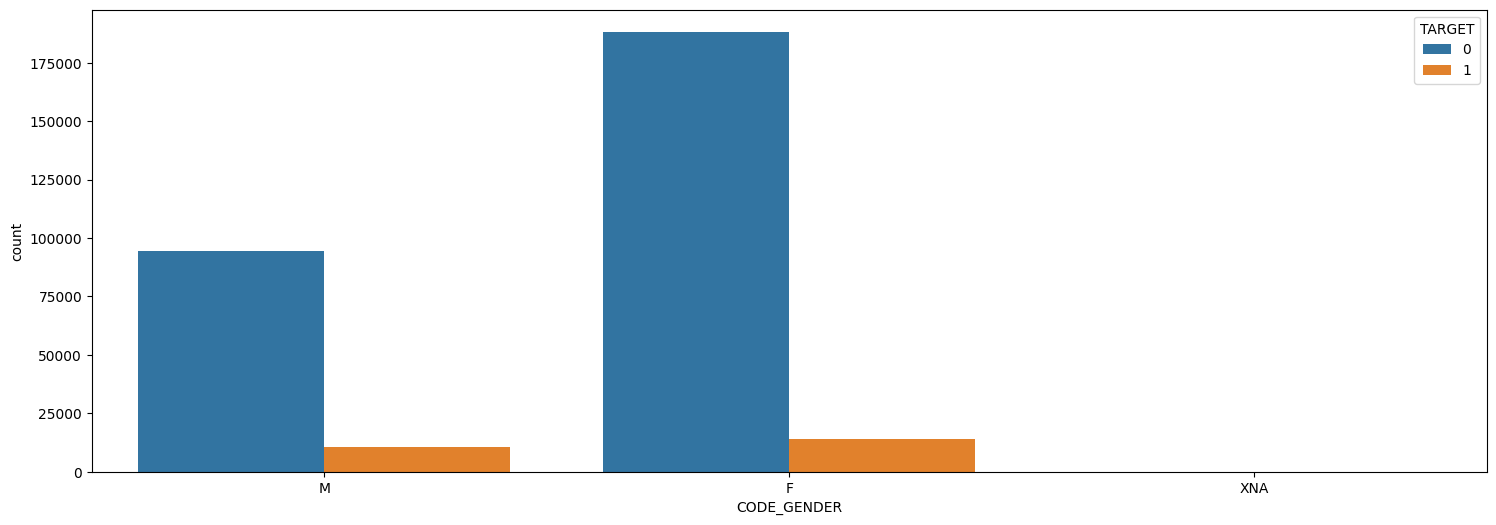

In [50]:
#Segmented analysis Men vs Women wrt defaulters
plt.figure(figsize=(18,6))
sns.countplot(x='CODE_GENDER',hue='TARGET',data=application)
plt.show()
#More women defaulters than Men 

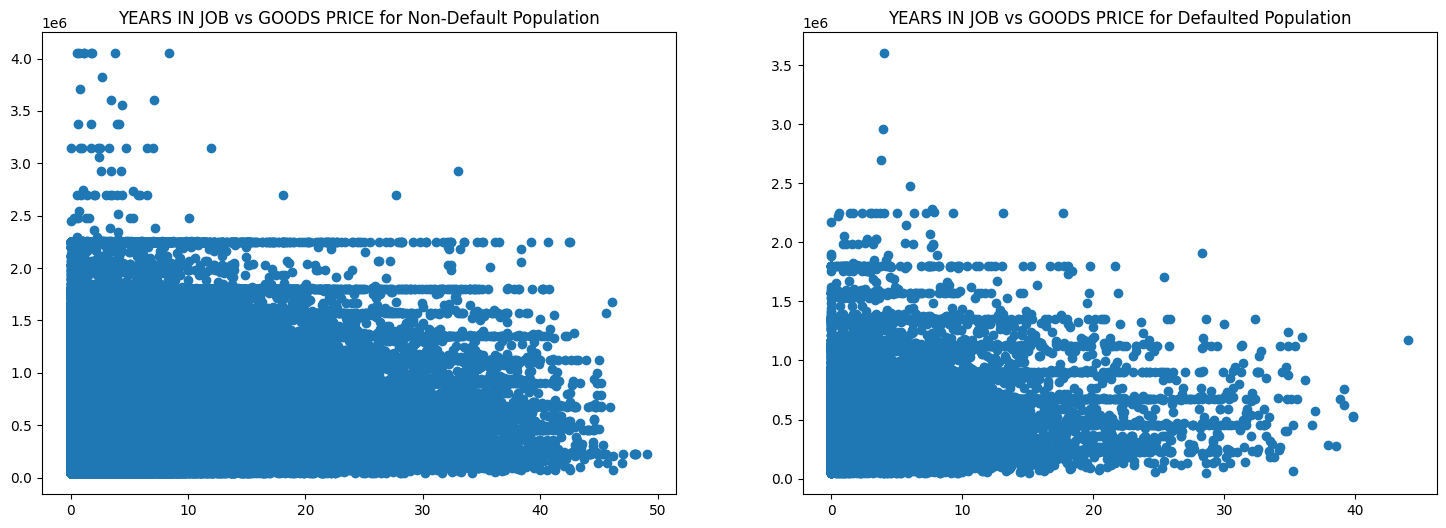

In [51]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.scatter(x='YEARS_EMPLOYED',y='AMT_GOODS_PRICE',data=application[application.TARGET==0])
plt.title('YEARS IN JOB vs GOODS PRICE for Non-Default Population')

plt.subplot(122)
plt.scatter(x='YEARS_EMPLOYED',y='AMT_GOODS_PRICE',data=application[application.TARGET==1])
plt.title('YEARS IN JOB vs GOODS PRICE for Defaulted Population')
plt.show()

#New job holders are going for higher goods price amount and are mostly able to repay the loans
#Rate of defaulters is decreasing with employment time & gooD

In [52]:
application[(application.TARGET==0) & (application.AMT_INCOME_TOTAL<1000)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,INCOME_RANGE,Ext_Rating_3,AGE_GROUP


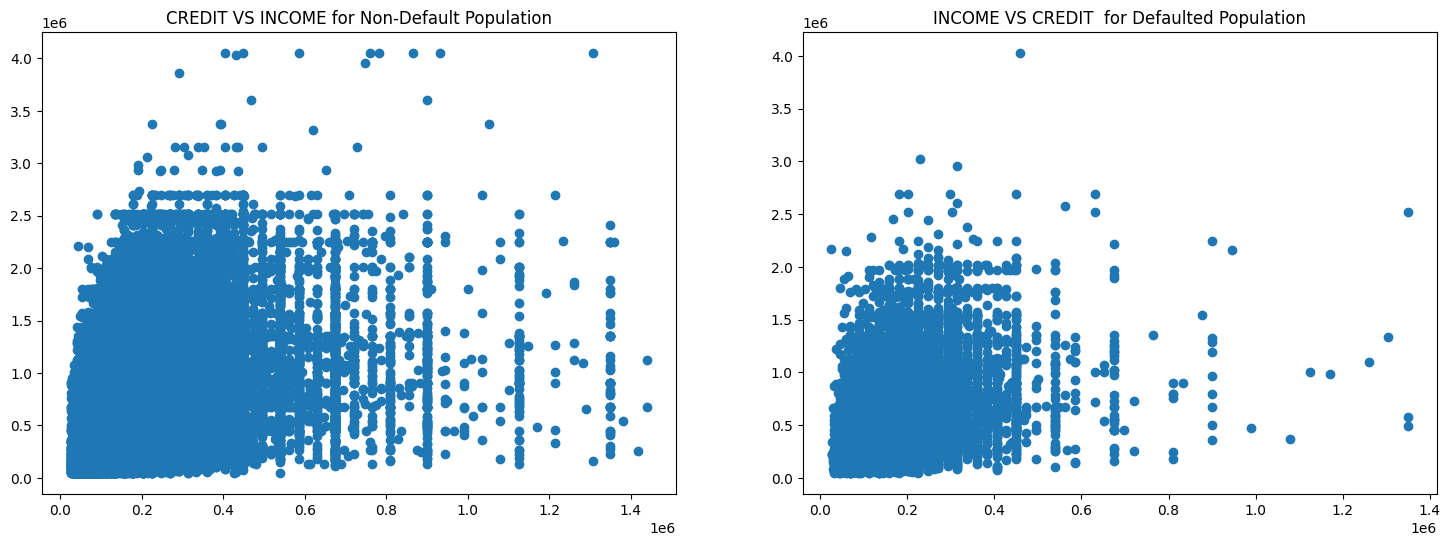

In [53]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.scatter(y='AMT_CREDIT',x='AMT_INCOME_TOTAL',data=application[(application.TARGET==0 ) & (application.AMT_INCOME_TOTAL<1500000)])
plt.title('CREDIT VS INCOME for Non-Default Population')

plt.subplot(122)
plt.scatter(y='AMT_CREDIT',x='AMT_INCOME_TOTAL',data=application[(application.TARGET==1 ) &  (application.AMT_INCOME_TOTAL<1500000)])
plt.title('INCOME VS CREDIT  for Defaulted Population')
plt.show()

#we do not see many defaulters with high amt_credit 
#Credit amount is usually high for non defaulted population 
# for both default and non default popoulation there are more applicant from low income group and low credit amount

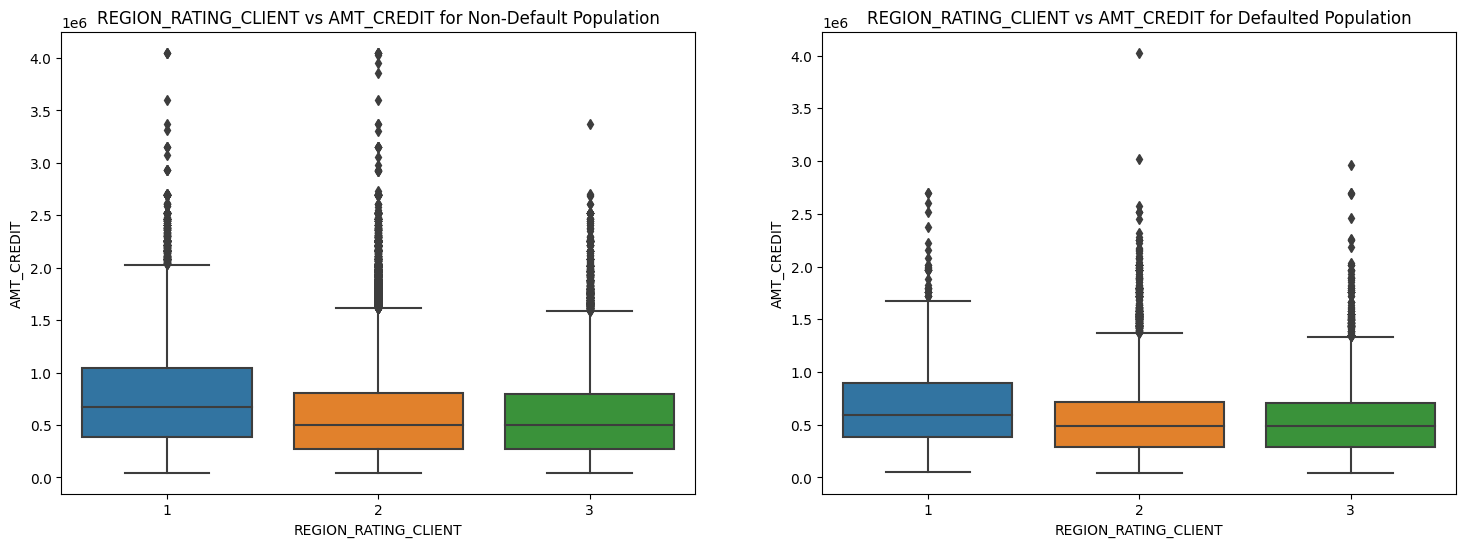

In [54]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(y='AMT_CREDIT',x='REGION_RATING_CLIENT',data=application[application.TARGET==0])
plt.title('REGION_RATING_CLIENT vs AMT_CREDIT for Non-Default Population')

plt.subplot(122)
sns.boxplot(y='AMT_CREDIT',x='REGION_RATING_CLIENT',data=application[application.TARGET==1])
plt.title('REGION_RATING_CLIENT vs AMT_CREDIT for Defaulted Population')
plt.show()
#More defaulters with low region rating with higher AMT_CREDIT

In [55]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,INCOME_RANGE,Ext_Rating_3,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849,Medium,Very Low,"(20.0, 30.0]"
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493,High,Low,"(40.0, 50.0]"
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877,Very Low,High,"(50.0, 60.0]"
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,2.0,0.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.068493,8.326027,26.939726,6.676712,1.690411,Low,Low,"(50.0, 60.0]"
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137,Low,Low,"(50.0, 60.0]"


In [56]:
previous.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


<Axes: xlabel='WEEKDAY_APPR_PROCESS_START'>

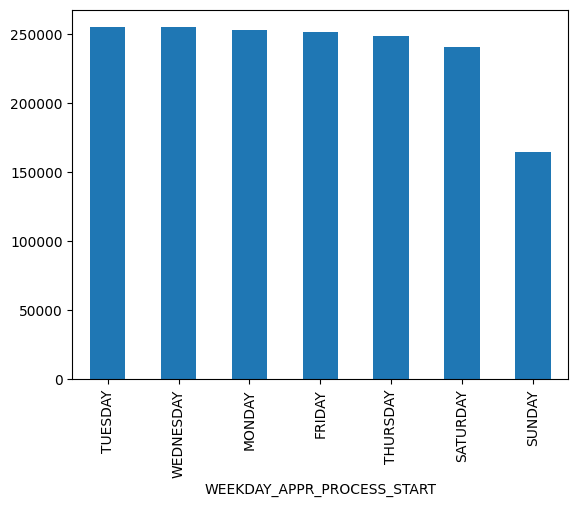

In [57]:
previous.WEEKDAY_APPR_PROCESS_START.value_counts().plot(kind='bar')
# As expected less applications on weekends

## Dividing the data into two sets, i.e. Target=1 and Target=0

### Merging the data

In [58]:
#Merging the data
Merged = pd.merge(application, previous, how='left', on=['SK_ID_CURR'])

In [59]:
Target1=Merged[Merged.TARGET==1]
Target0=Merged[Merged.TARGET==0]
print(Target1.shape,Target0.shape)

(123340, 101) (1306813, 101)


In [60]:
Merged.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START_x,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.430153e+06,1.429981e+06,1.430153e+06,1.430153e+06,1.430060e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430152e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06
mean,2.784703e+05,4.029914e-01,1.736034e+05,5.893385e+05,2.704202e+04,5.292227e+05,2.079101e-02,1.199400e+01,5.118495e-01,4.978159e-01,1.538149e+00,1.520323e+00,2.652255e-01,2.664892e+00,4.469852e+01,5.421127e+00,1.370213e+01,8.313678e+00,2.949235e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02,1.605194e+01
std,1.028021e+05,7.110026e-01,1.983303e+05,3.874206e+05,1.404003e+04,3.557173e+05,1.339810e-02,3.233164e+00,1.909532e-01,1.796804e-01,2.525674e+00,2.503921e+00,9.254473e-01,2.160270e+00,1.190887e+01,6.286327e+00,9.730485e+00,4.129265e+00,2.201916e+00,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.456675e+01
min,1.000020e+05,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.051781e+01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.893610e+05,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,1.003200e-02,1.000000e+01,3.900720e-01,3.825018e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.487671e+01,7.726027e-01,5.471233e+00,4.884932e+00,1.049315e+00,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,4.982850e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00
50%,2.789560e+05,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,1.885000e-02,1.200000e+01,5.634135e-01,5.352763e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.393699e+01,3.498630e+00,1.234521e+01,9.123288e+00,2.728767e+00,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102455e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01
75%,3.675090e+05,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,6.795000e+05,2.866300e-02,1.400000e+01,6.608437e-01,6.212263e-01,2.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00,5.472603e+01,7.739726e+00,2.057260e+01,1.183288e+01,4.597260e+00,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01
max,4.562550e+05,5.000000e+00,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,2.300000e+01,8.549997e-01,8.960095e-01,3.480000e+02,3.440000e+02,2.700000e+01,2.500000e+01,6.912055e+01,4.907397e+01,6.759452e+01,1.971781e+01,1.175890e+01,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [61]:
#Inspecting the shape
Merged.shape

(1430153, 101)

In [62]:
#Inspecting the columns
Merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object', length=101)

In [63]:
#Deriving few columns for analysis
Merged["AMT_CREDIT_APPLICATION_DIFF"]=Merged["AMT_CREDIT_y"]-Merged["AMT_APPLICATION"]
Merged.loc[:,'YEARS_EMPLOYED_RANGE']=pd.qcut(Merged.loc[:,'YEARS_EMPLOYED'],q=[0,0.3,0.5,0.7,0.90,1])
Merged.loc[:,'AMT_CREDIT_APPLICATION_DIFF_RANGE']=pd.qcut(Merged.loc[:,'AMT_CREDIT_APPLICATION_DIFF'],q=[0,0.10,0.50,0.75,0.99,1])
labels=["Much lower than Asked","Lower Thank Asked","Higher than asked","Much Higher than asked","Very Higher than asked"]

### Bi variate analysis

In [64]:
Merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'AMT_CREDIT_APPLICATION_DIFF', 'YEARS_EMPLOYED_RANGE', 'AMT_CREDIT_APPLICATION_DIFF_RANGE'], dtype='object', length=104)

In [65]:
# function to plot for categorical variables
def bivarplots(var):
    
    sns.countplot(x=var,hue="TARGET", data=Merged)
    plt.title('Distribution of '+ '%s' %var +' wrt TARGET', fontsize=18)
    plt.xlabel(var,fontsize=16)
    plt.xticks(rotation=90)
    plt.ylabel('Total Applicants',fontsize=16)
    

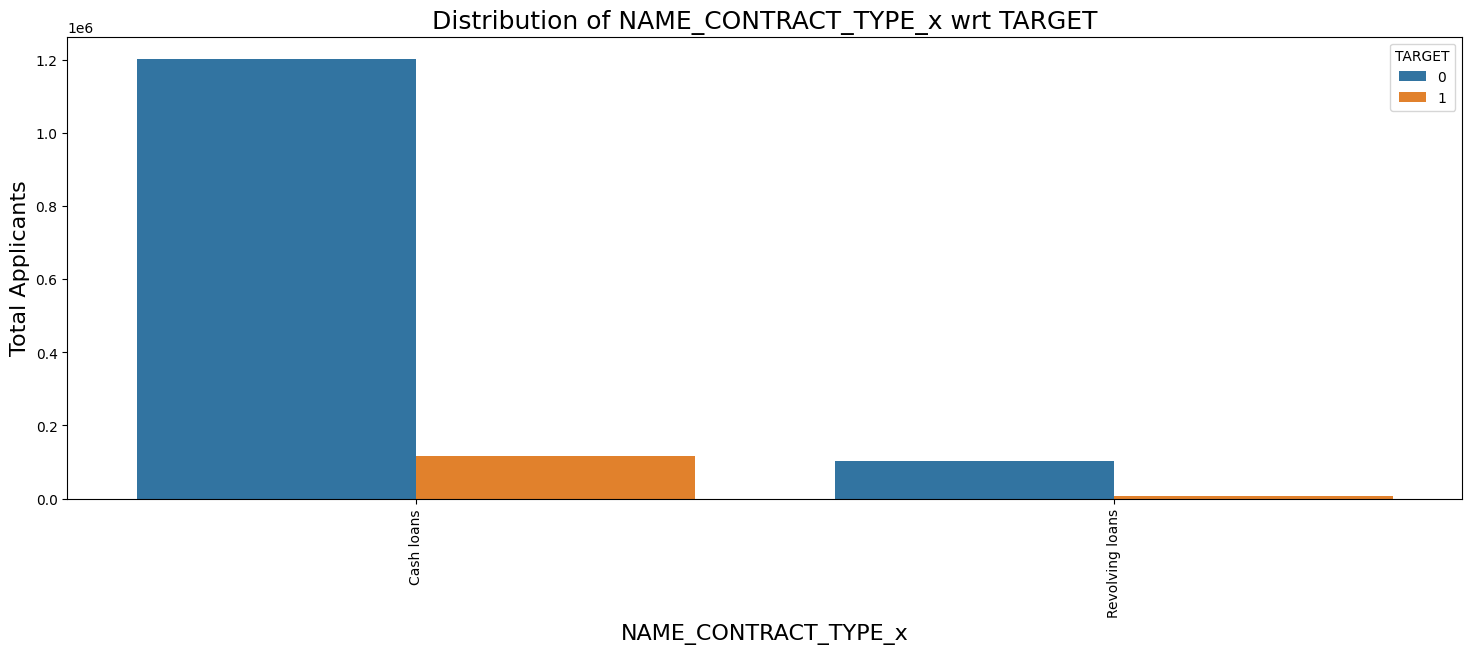

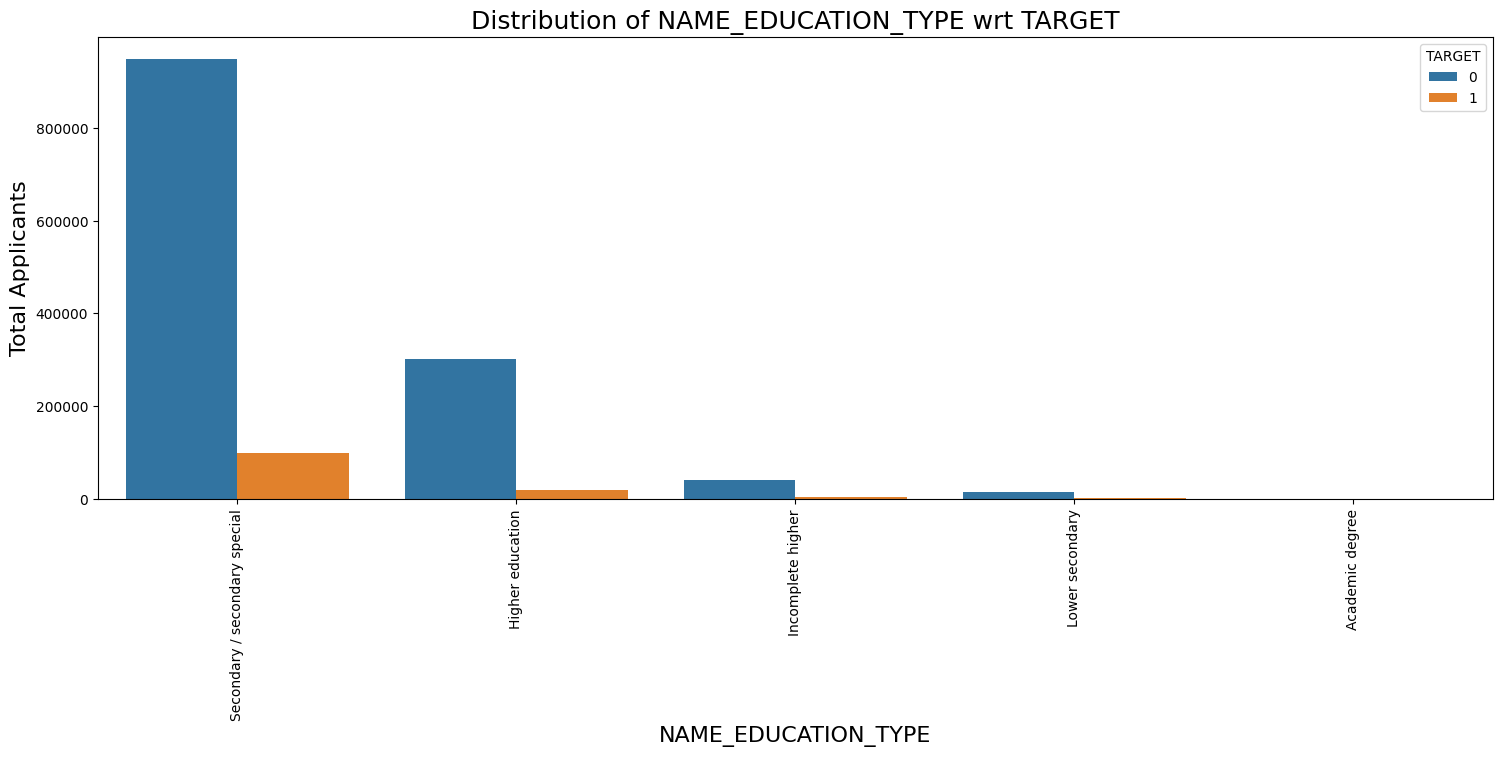

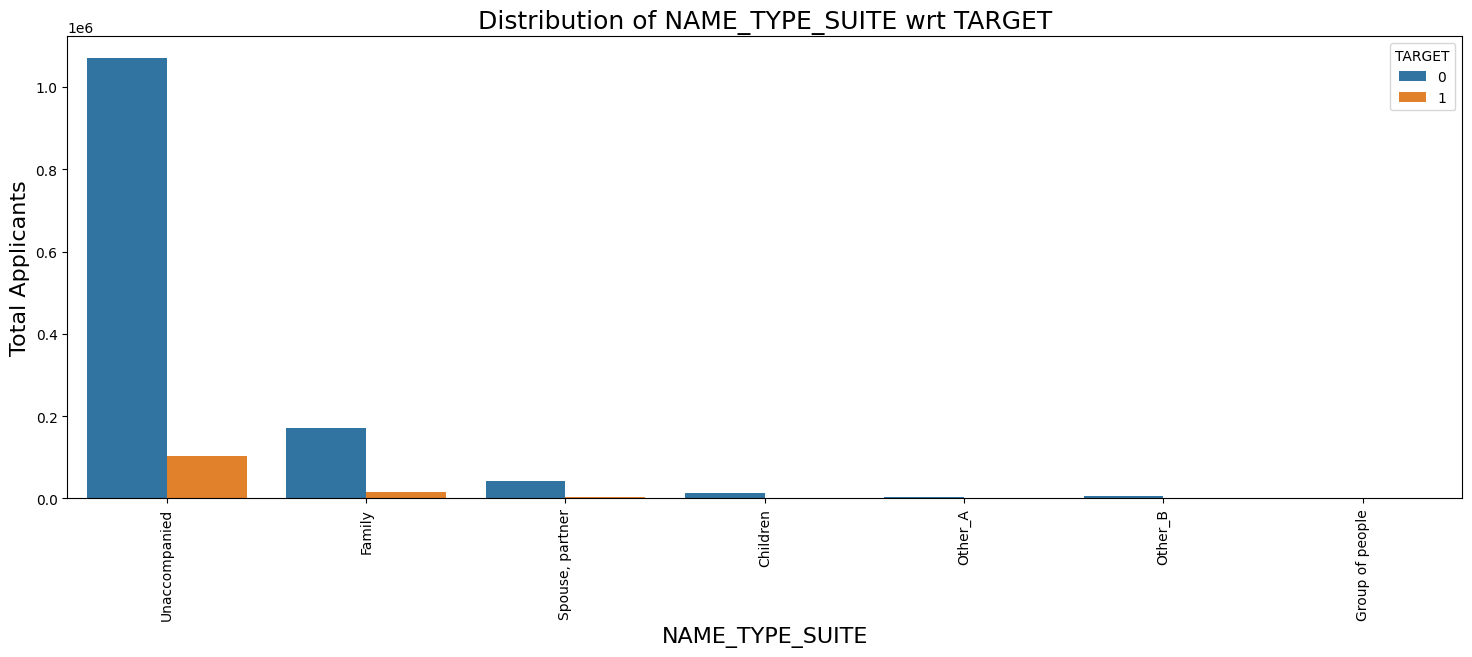

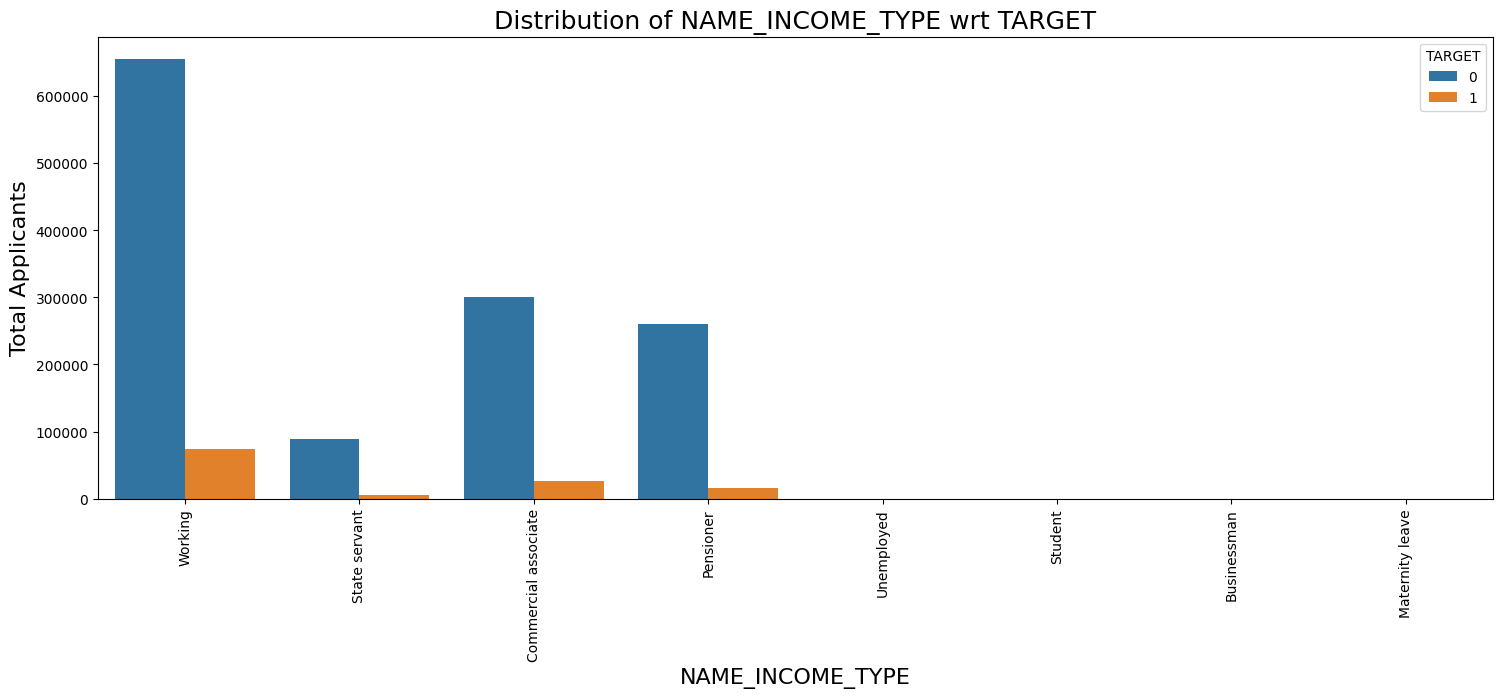

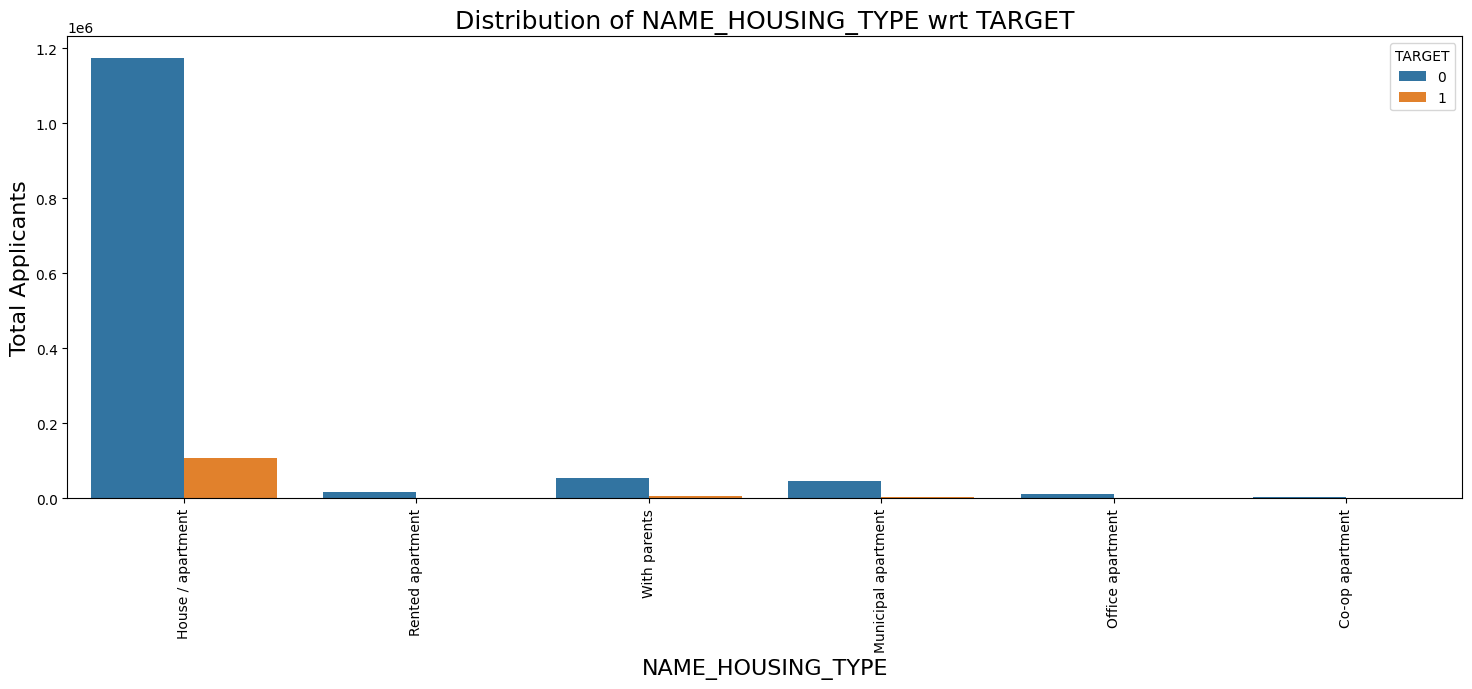

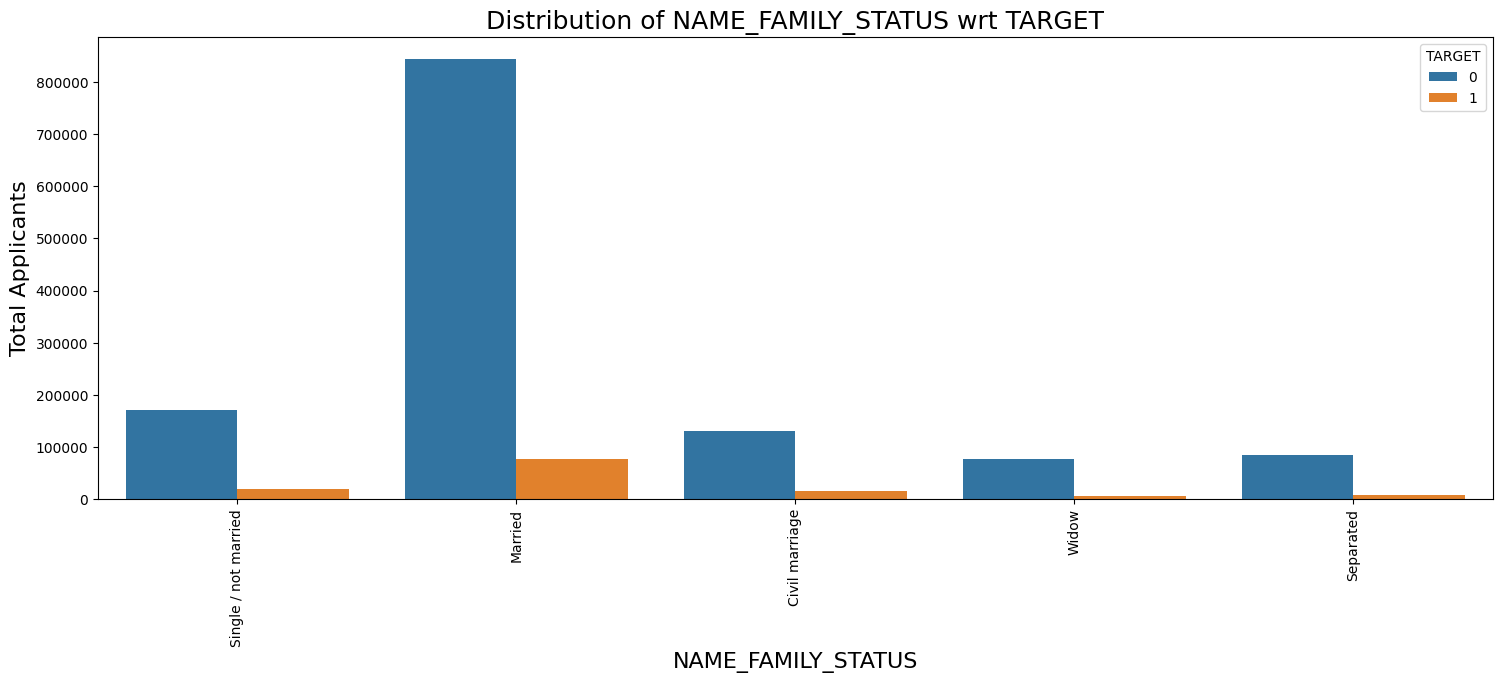

In [66]:
#plotting count plot for below categorical variables with respect to the Target variable
bivarcols=['NAME_CONTRACT_TYPE_x','NAME_EDUCATION_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS']
j=0
for i in bivarcols:
    j=j+1
    plt.figure(i,figsize=(18,6))
    #plt.subplot(7,1,j)
    bivarplots(i)
    plt.show()
#Defaulted population has Less Revolving loans. Therefore Revolving loans are safer. 
#This may be because revolving loans have a flexible repayment and re-borrowing feature.
# NAME_TYPE_SUITE variable has no impact on Default/Non-Default. Both populations have same proportions.
# Working population has higher presence in Defaults.
# Customers living on Rent and with Parents have higher default rate. Customers living on rent can be more suspicious since they do not have a permanent home and can move around easily to avoid loan repayment. 
# Customers living with parents may not be having high income.
# Single/ not married have higher defaults but the percentage of derfaulters is relatively low compared to other categories.
# Higher education customers are lower in Defaulted population but the percentile is higher compared to others
# Secondary/Secondary special education have lesser difficulty paying the loans
# Customers with Higher Education should be earning more and hence it is easier for them to pay off loan installments.

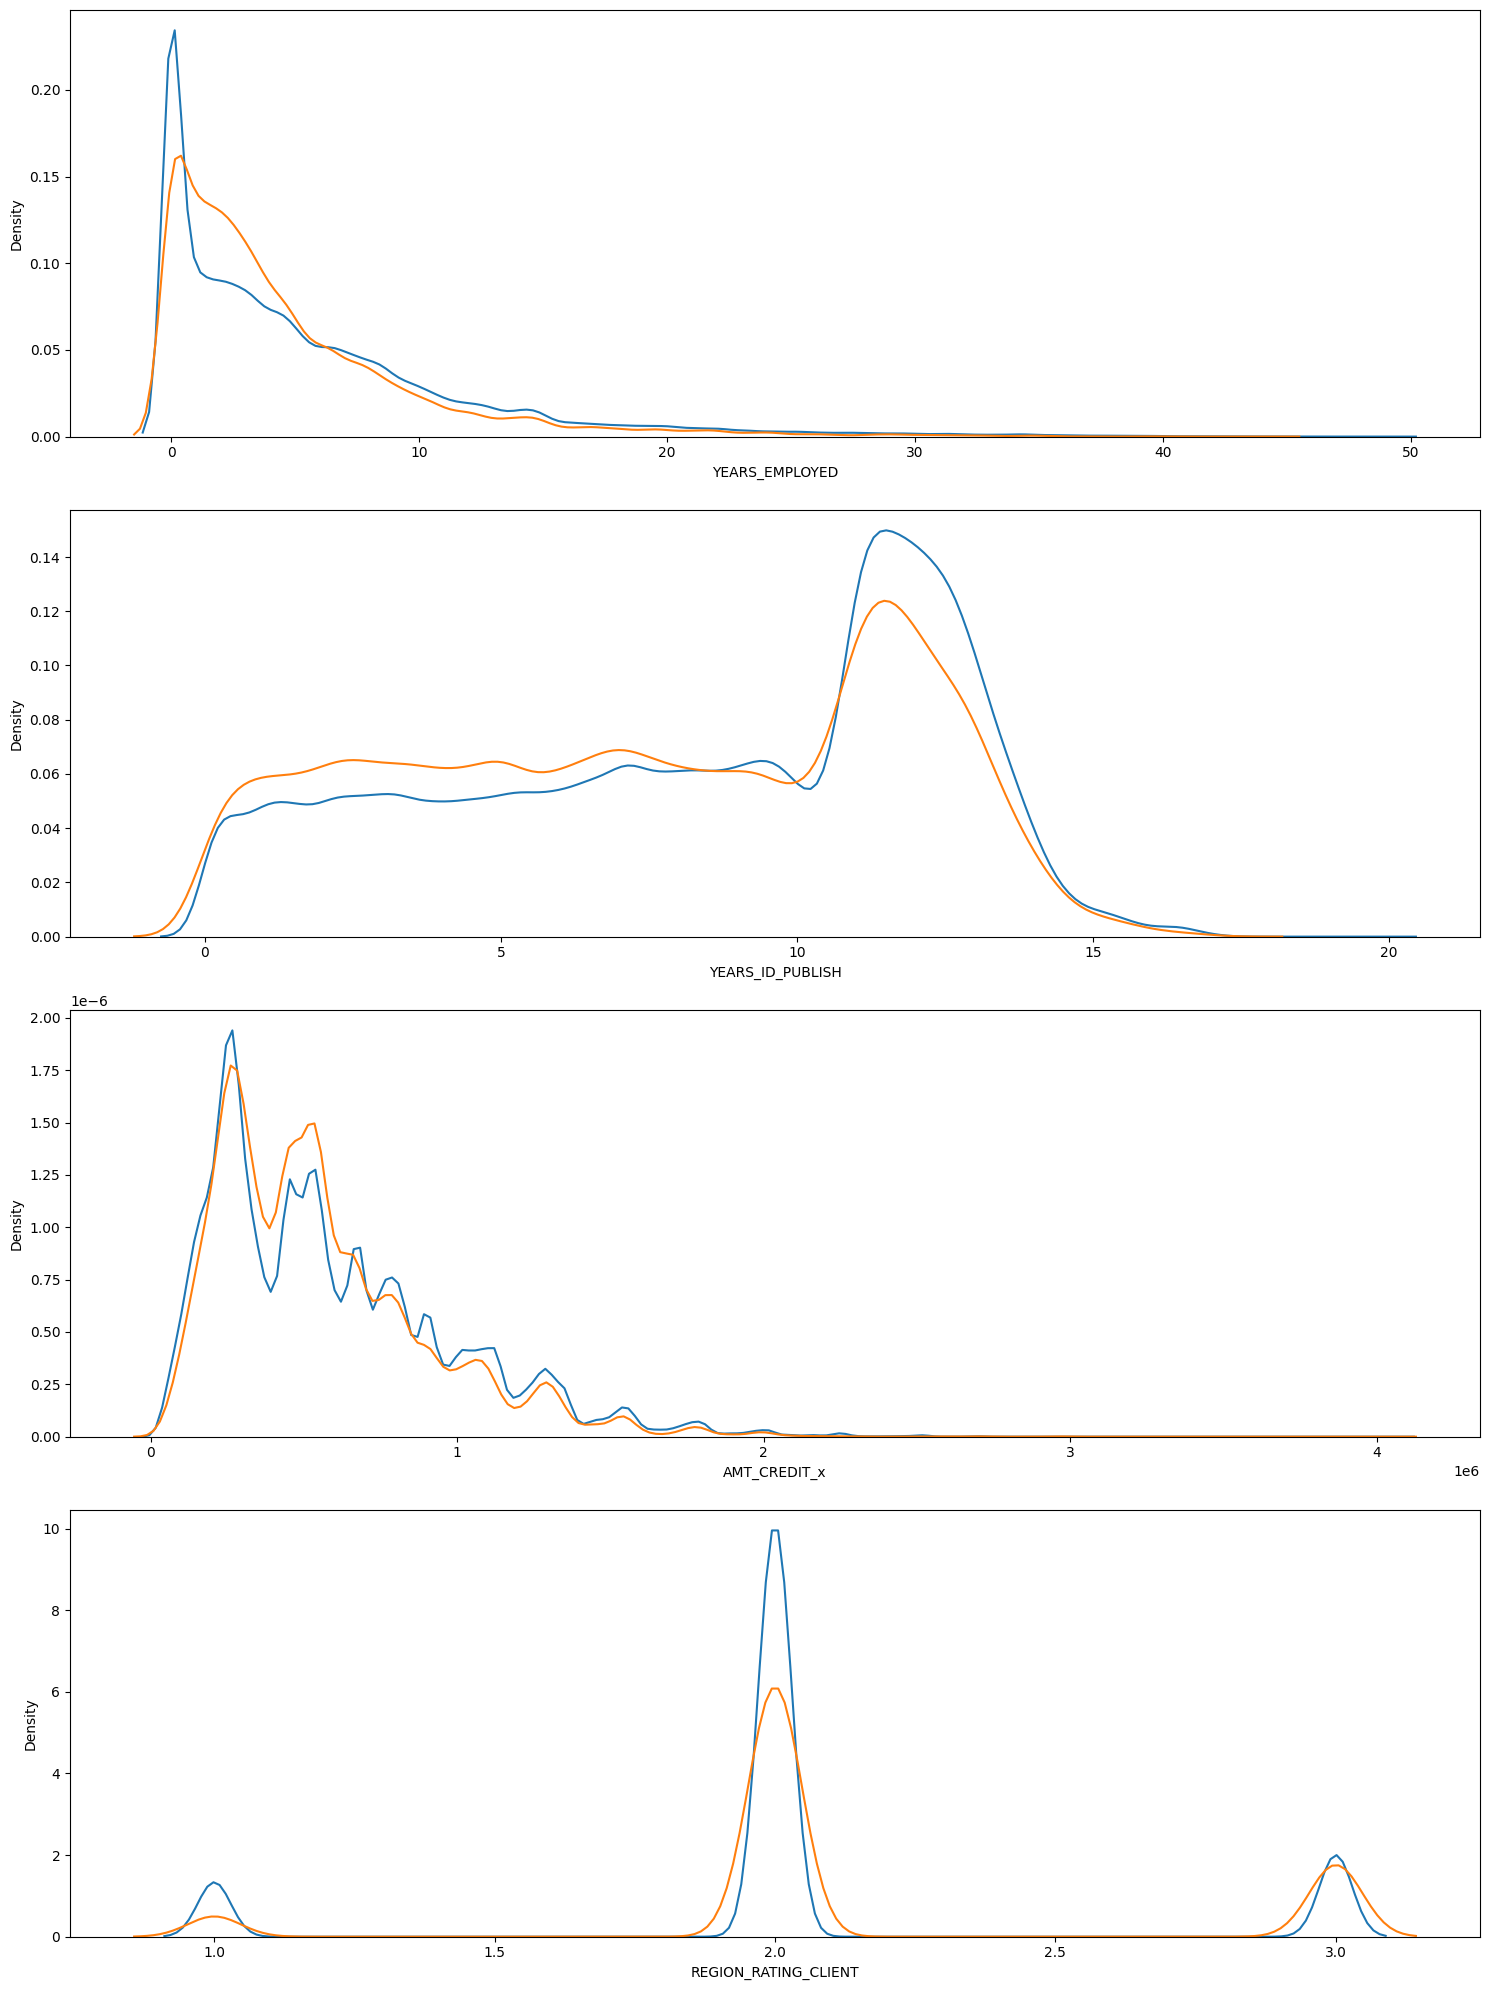

In [67]:
#plotting distribution plot for numerical variables to understand the data spread with respect to Target variable
col=["YEARS_EMPLOYED","YEARS_ID_PUBLISH","AMT_CREDIT_x","REGION_RATING_CLIENT"]
fig=plt.figure(figsize = (15,20))
for i in enumerate(col):
    plt.subplot(len(col), 1, i[0]+1)
    sns.distplot(Target0[i[1]], hist = False)# Target = No
    sns.distplot(Target1[i[1]], hist = False)# Taget = Yes
    
fig.tight_layout()

#More defaulters for clients who have been employed between 2-6 years, less defaulter after 40
#More defaulters for those who recently got ID changed/New -
#Defaultres for AMT_Credit 3-5 lk
#High defaulters for low region rating

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

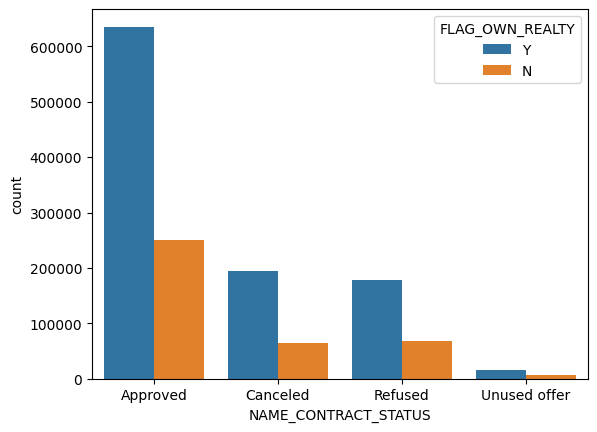

In [68]:
sns.countplot(x = "NAME_CONTRACT_STATUS", hue = 'FLAG_OWN_REALTY', data = Merged)
#Application is mostly approved for applicants owning realty

In [69]:
Merged.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START_x,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,AMT_CREDIT_APPLICATION_DIFF
count,1.430153e+06,1.429981e+06,1.430153e+06,1.430153e+06,1.430060e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430153e+06,1.430152e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,1.094176e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.106488e+06,1.413700e+06
mean,2.784703e+05,4.029914e-01,1.736034e+05,5.893385e+05,2.704202e+04,5.292227e+05,2.079101e-02,1.199400e+01,5.118495e-01,4.978159e-01,1.538149e+00,1.520323e+00,2.652255e-01,2.664892e+00,4.469852e+01,5.421127e+00,1.370213e+01,8.313678e+00,2.949235e+00,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,2.264512e+05,1.247893e+01,9.964321e-01,-8.803670e+02,3.149878e+02,1.605194e+01,2.111037e+04
std,1.028021e+05,7.110026e-01,1.983303e+05,3.874206e+05,1.404003e+04,3.557173e+05,1.339810e-02,3.233164e+00,1.909532e-01,1.796804e-01,2.525674e+00,2.503921e+00,9.254473e-01,2.160270e+00,1.190887e+01,6.286327e+00,9.730485e+00,4.129265e+00,2.201916e+00,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,3.159376e+05,3.331474e+00,5.962560e-02,7.835402e+02,7.695082e+03,1.456675e+01,7.232504e+04
min,1.000020e+05,0.000000e+00,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.051781e+01,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-3.020450e+06
25%,1.893610e+05,0.000000e+00,1.125000e+05,2.700000e+05,1.679850e+04,2.385000e+05,1.003200e-02,1.000000e+01,3.900720e-01,3.825018e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.487671e+01,7.726027e-01,5.471233e+00,4.884932e+00,1.049315e+00,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,4.982850e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00,0.000000e+00
50%,2.789560e+05,0.000000e+00,1.575000e+05,5.084955e+05,2.491650e+04,4.500000e+05,1.885000e-02,1.200000e+01,5.634135e-01,5.352763e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.393699e+01,3.498630e+00,1.234521e+01,9.123288e+00,2.728767e+00,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102455e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01,0.000000e+00
75%,3.675090e+05,1.000000e+00,2.115000e+05,8.086500e+05,3.457350e+04,6.795000e+05,2.866300e-02,1.400000e+01,6.608437e-01,6.212263e-01,2.000000e+00,2.000000e+00,0.000000e+00,4.000000e+00,5.472603e+01,7.739726e+00,2.057260e+01,1.183288e+01,4.597260e+00,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01,1.316250e+04
max,4.562550e+05,5.000000e+00,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,2.300000e+01,8.549997e-01,8.960095e-01,3.480000e+02,3.440000e+02,2.700000e+01,2.500000e+01,6.912055e+01,4.907397e+01,6.759452e+01,1.971781e+01,1.175890e+01,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01,1.350000e+06


<Axes: xlabel='NAME_CLIENT_TYPE', ylabel='count'>

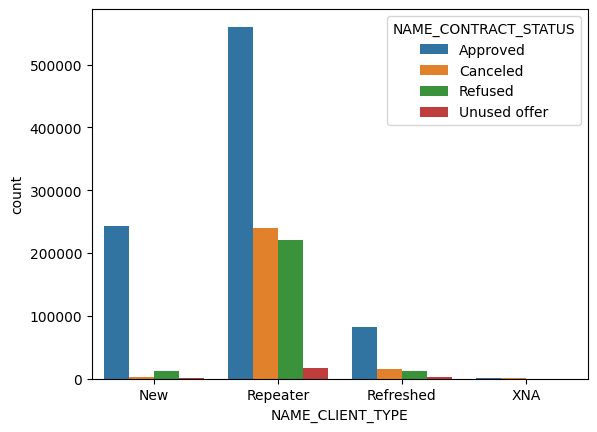

In [70]:
sns.countplot(x = "NAME_CLIENT_TYPE", hue = 'NAME_CONTRACT_STATUS', data = Merged)
#Not much concrete information here based on the client type , at 1st look seems New clients have more approval rate (relatively)
# and refreshed clients have more cancellations

In [71]:
approved=Merged[Merged.NAME_CONTRACT_STATUS=='Approved']
refused=Merged[Merged.NAME_CONTRACT_STATUS=='Refused']
cancelled=Merged[Merged.NAME_CONTRACT_STATUS=='Canceled']
unused=Merged[Merged.NAME_CONTRACT_STATUS=='Unused Offer']

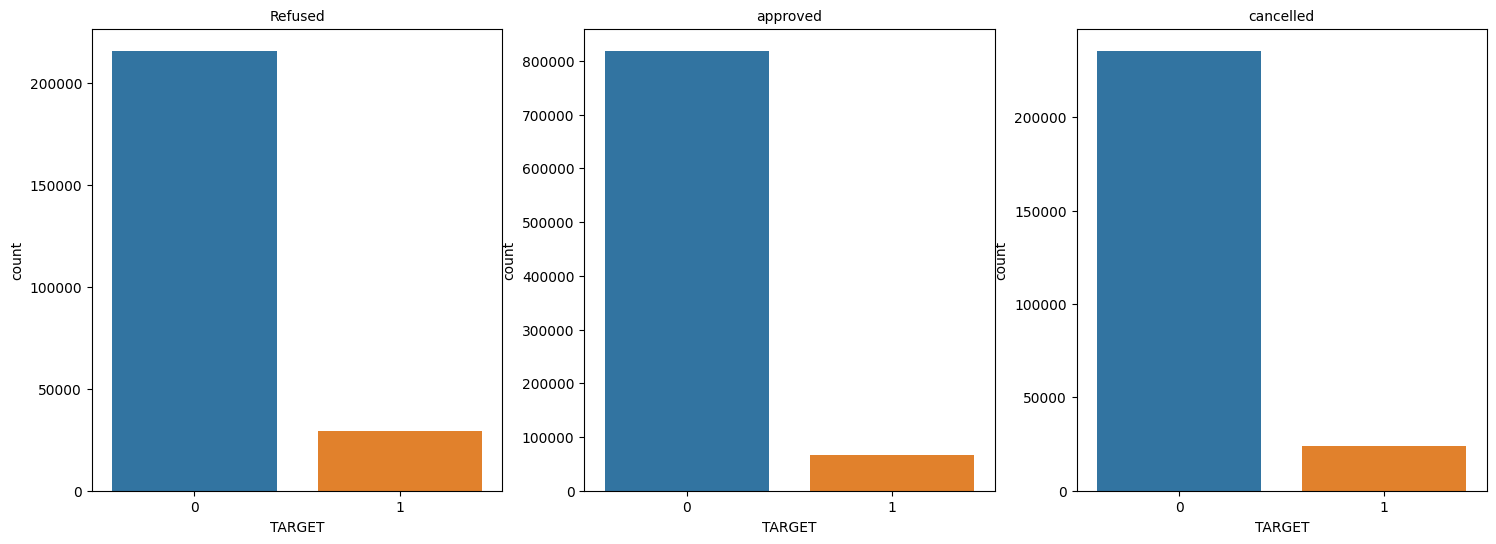

In [72]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.countplot(x='TARGET',data=refused)
plt.title("Refused", fontsize=10)
plt.subplot(1,3,2)   
sns.countplot(x='TARGET',data=approved)
plt.title("approved", fontsize=10)
plt.subplot(1,3,3)   
sns.countplot(x='TARGET',data=cancelled)
plt.title("cancelled", fontsize=10)
plt.show()
#More Defaults in loans which were previously refused or cancelled

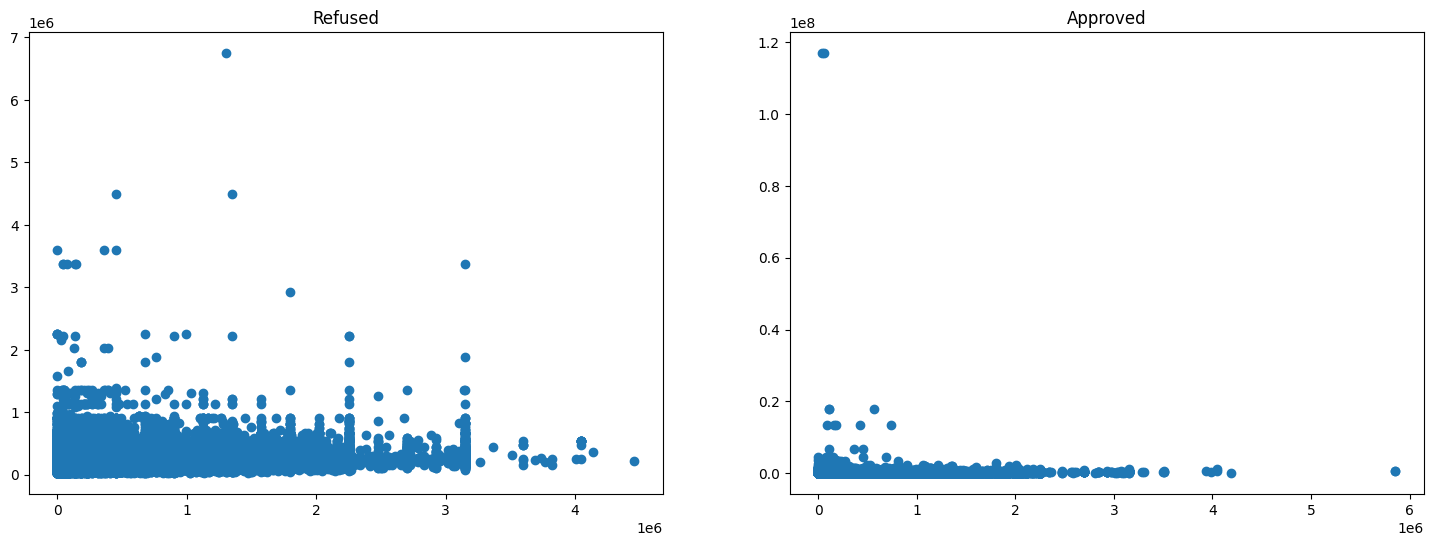

In [73]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.scatter(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')

plt.subplot(1,2,2)
plt.scatter(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')
plt.show()
#####  Observations:
##### Loan request higher than 200k had a higher rejection rate. Also loan rejection rate was much lower if the income was higher than 500k.
##### Loan request higher than 200k had a higher rejection rate.
##### Lower income groups had higher rejection rate

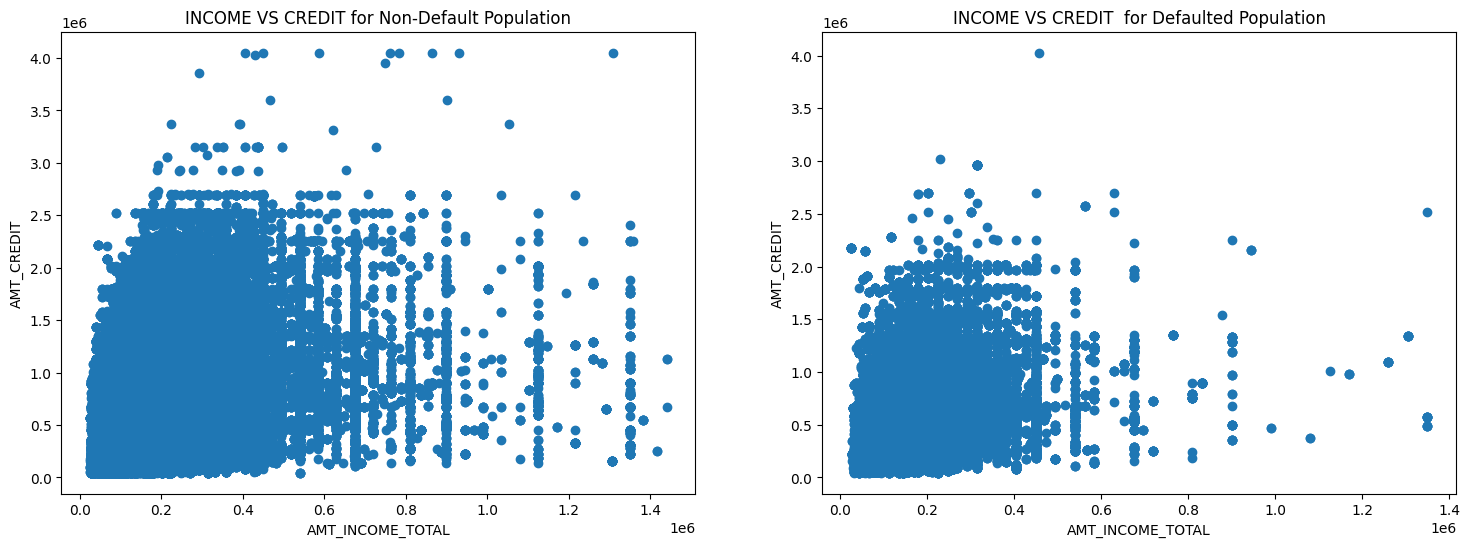

In [74]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.scatter(y='AMT_CREDIT_x',x='AMT_INCOME_TOTAL',data=Target0[Target0.AMT_INCOME_TOTAL<1500000])
plt.title('INCOME VS CREDIT for Non-Default Population')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')

plt.subplot(122)
plt.scatter(y='AMT_CREDIT_x',x='AMT_INCOME_TOTAL',data=Target1[Target1.AMT_INCOME_TOTAL<1500000])
plt.title('INCOME VS CREDIT  for Defaulted Population')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.show()

#Less defaulters from income group 500k+
#The purchasing power of good increses with income group 200k (able to buy higher price good and not default)

Text(0.5, 1.0, 'CREDIT vs Ext_Rating')

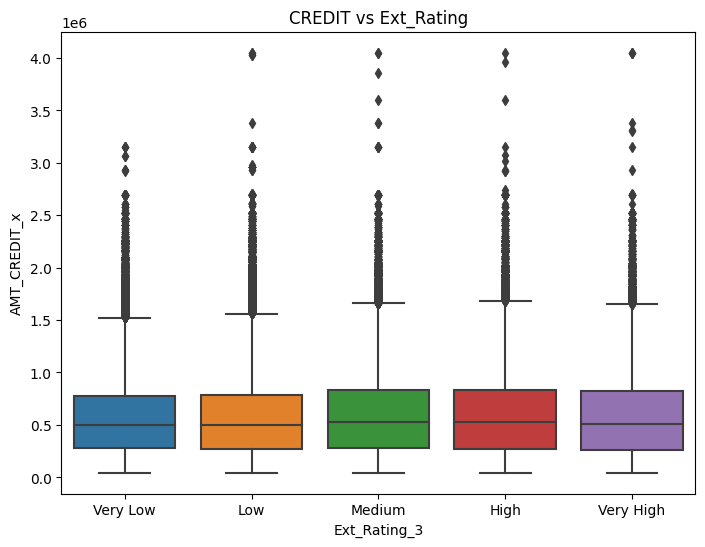

In [75]:
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.boxplot(y='AMT_CREDIT_x',x='Ext_Rating_3',data=Merged)
plt.title('CREDIT vs Ext_Rating')
#Some of Median rated clients are requesting for higher credits
#Very low and low rated clients are requesting credits within 3M

## Multivariate analysis on merged data

<Axes: xlabel='AGE_GROUP-INCOME_RANGE', ylabel='NAME_CONTRACT_STATUS'>

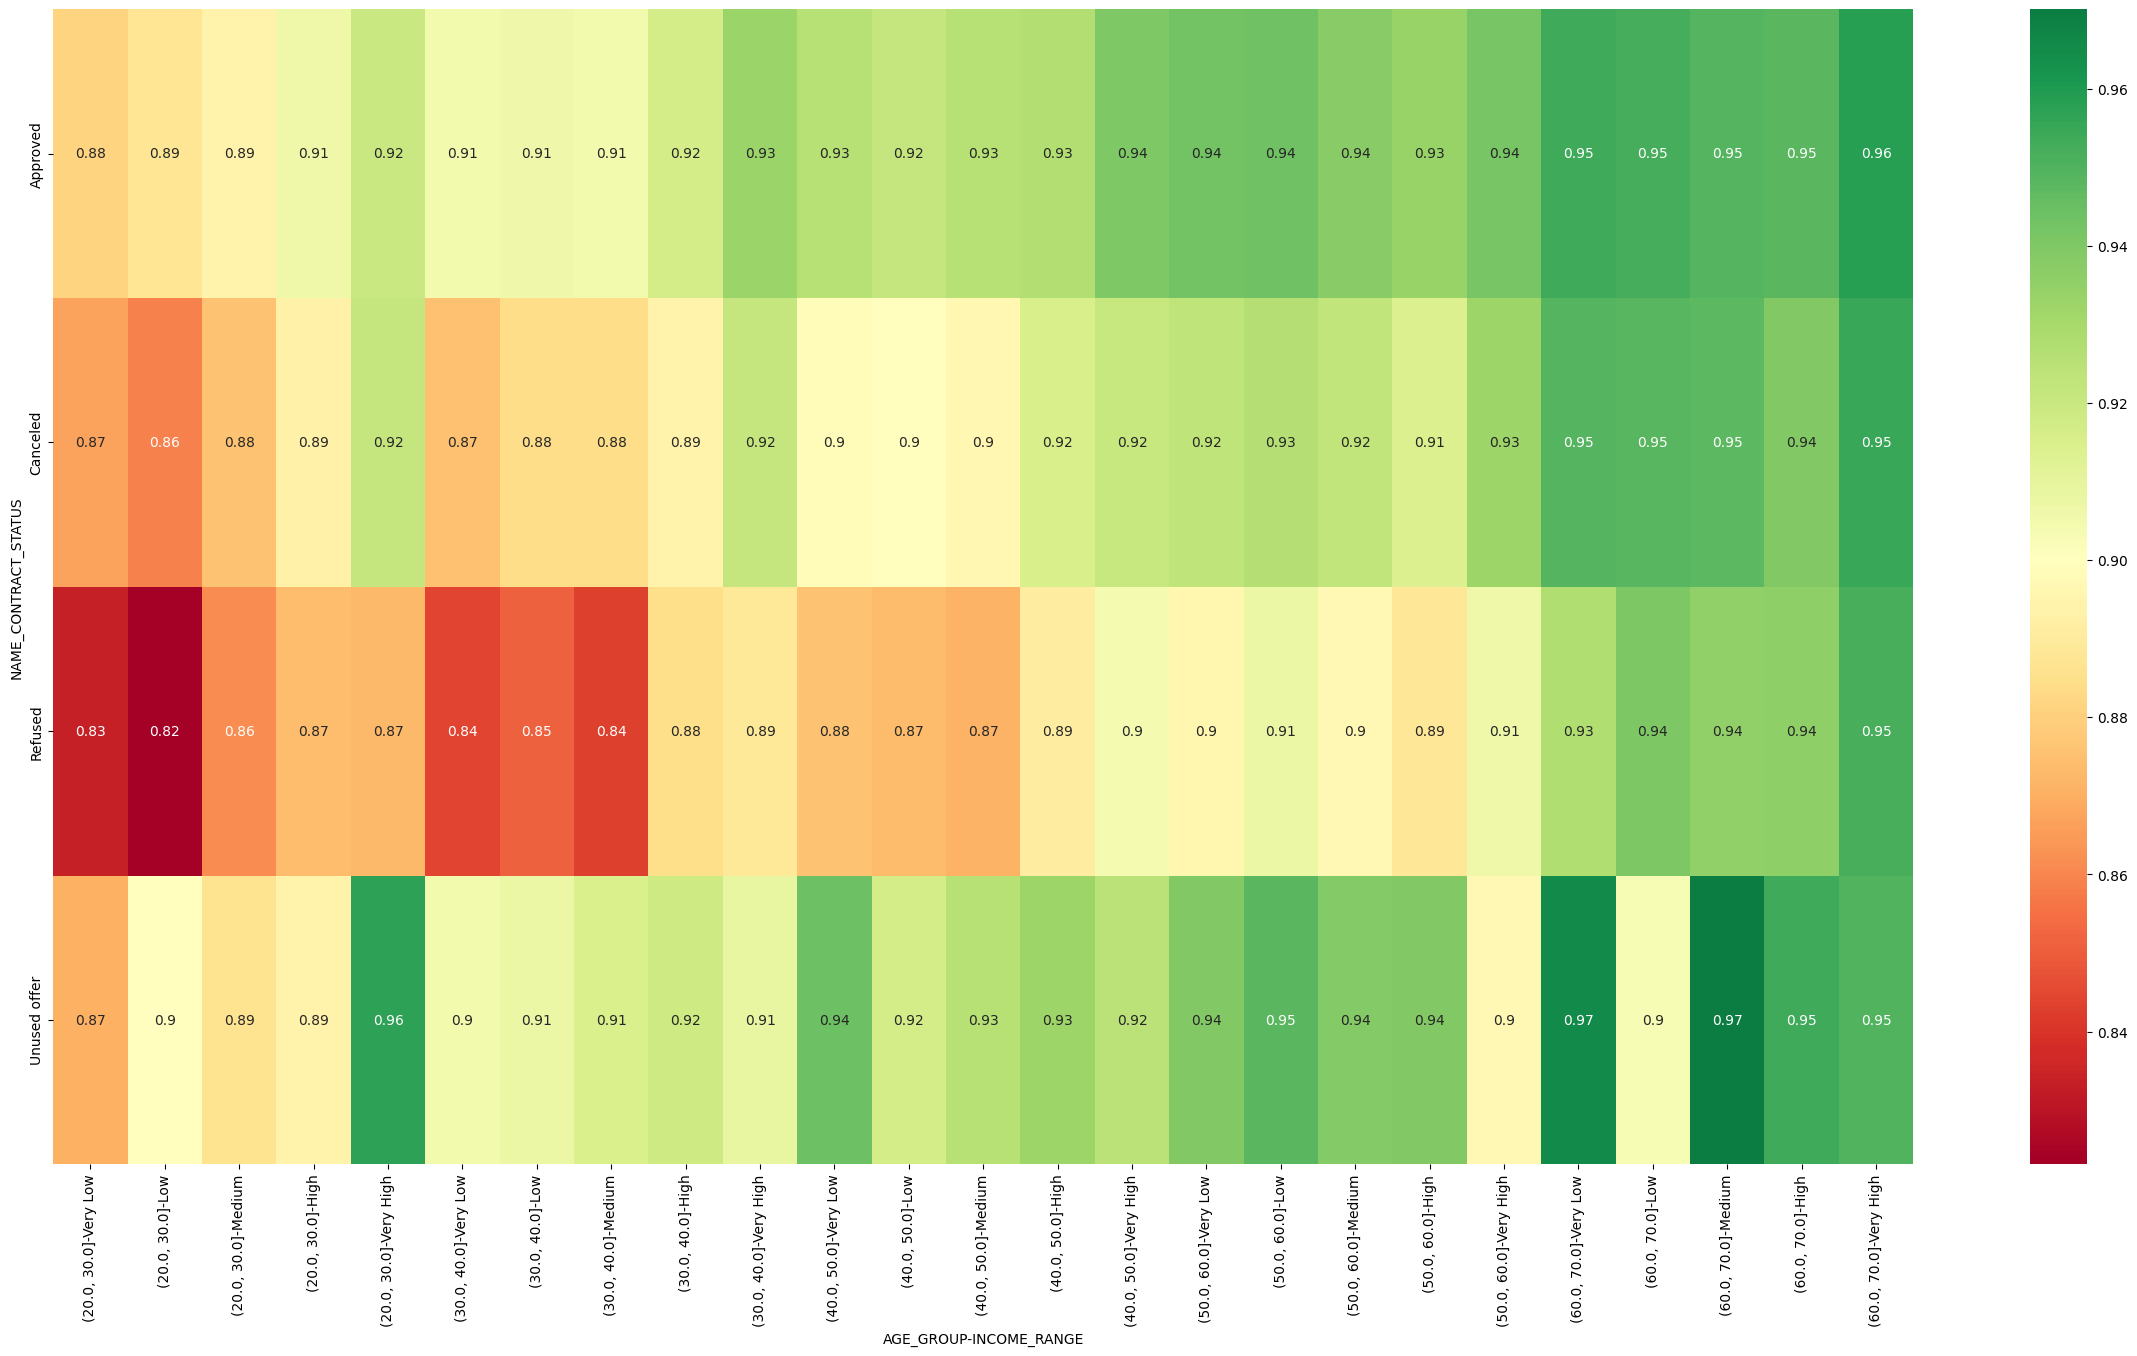

In [76]:
#Deriving few columns for analysis purpose
Merged["TARGET_FLAG"]=Merged["TARGET"].apply(lambda x: 0 if x==1 else 1)
Merged['TARGET_FLAG'] = Merged['TARGET_FLAG'].astype(int,errors='ignore')
plt.figure(figsize=(30,15))
res=pd.pivot_table(data=Merged,index="NAME_CONTRACT_STATUS",columns=["AGE_GROUP","INCOME_RANGE"],values="TARGET_FLAG")
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.9)
#Refused applications had higher default rate
#Very high income group whose applications were approved in the past had very low deafult rate

<Axes: xlabel='AGE_GROUP', ylabel='NAME_CONTRACT_STATUS'>

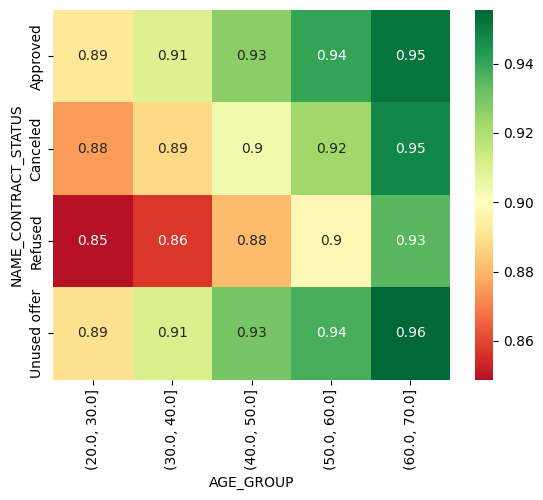

In [77]:
res1=pd.pivot_table(data=Merged,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values="TARGET_FLAG")
sns.heatmap(res1,annot=True,cmap="RdYlGn",center=0.9)
# Need to target:
#     1. Age group 60-70 is very good with repaying the loans , 
#     specifically the previously unused offers, need to work on why they were left unused- may be any promotions to encourage them
#     2.Better to be cautious with age group 20-30 and applicants with historic loan refusal
#     3.Client who had an unused offer previously are very low defaulters, , need to   on promotions so that can utilize

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='NAME_CONTRACT_STATUS-NAME_FAMILY_STATUS'>

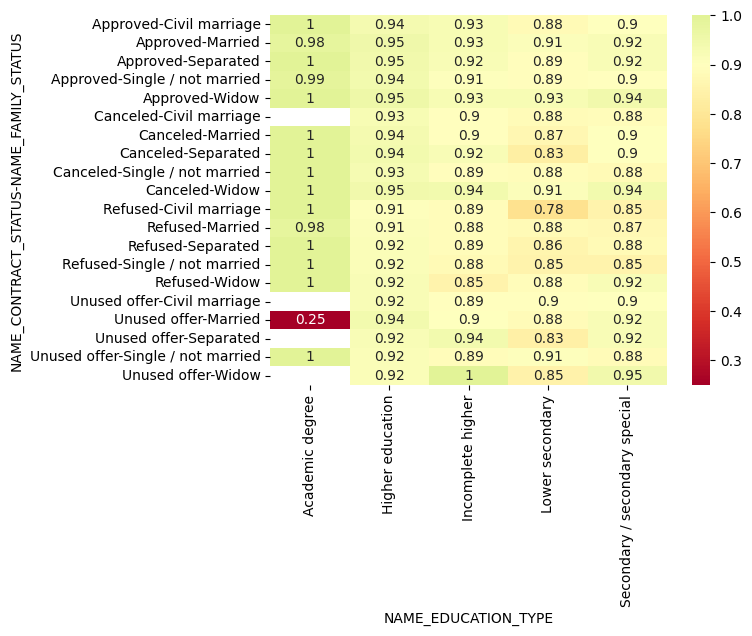

In [78]:
res2=pd.pivot_table(data=Merged,index=["NAME_CONTRACT_STATUS","NAME_FAMILY_STATUS"],columns="NAME_EDUCATION_TYPE",values="TARGET_FLAG")
sns.heatmap(res2,annot=True,cmap="RdYlGn",center=0.9)
# Target:
#     All clients with academic degree except married clients with unused offers

# Need to avoid:
#     Married Clients with academic degree who had an unused offer in the past
    


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='CHANNEL_TYPE'>

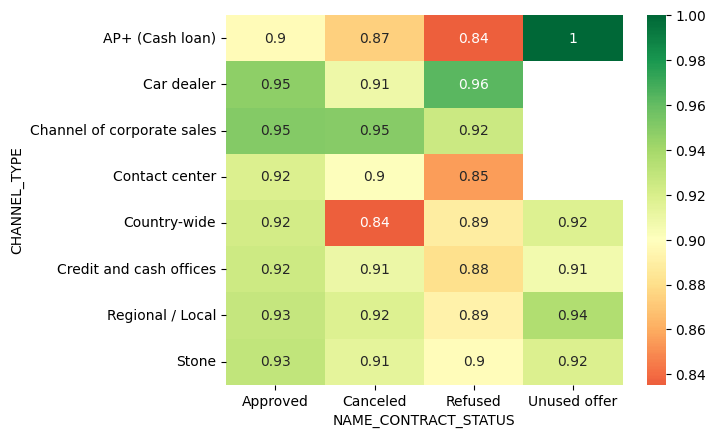

In [79]:
res3=pd.pivot_table(data=Merged,index=["CHANNEL_TYPE"],columns="NAME_CONTRACT_STATUS",values="TARGET_FLAG")
sns.heatmap(res3,annot=True,cmap="RdYlGn",center=0.9)
#No unused offers for car dealers, channel of corporate sales and contact center channels, 
# and they are good clients- Bank needs to extrapolate the same strategy across other channels

<Axes: xlabel='INCOME_RANGE-FLAG_OWN_REALTY-FLAG_OWN_CAR', ylabel='NAME_CONTRACT_STATUS'>

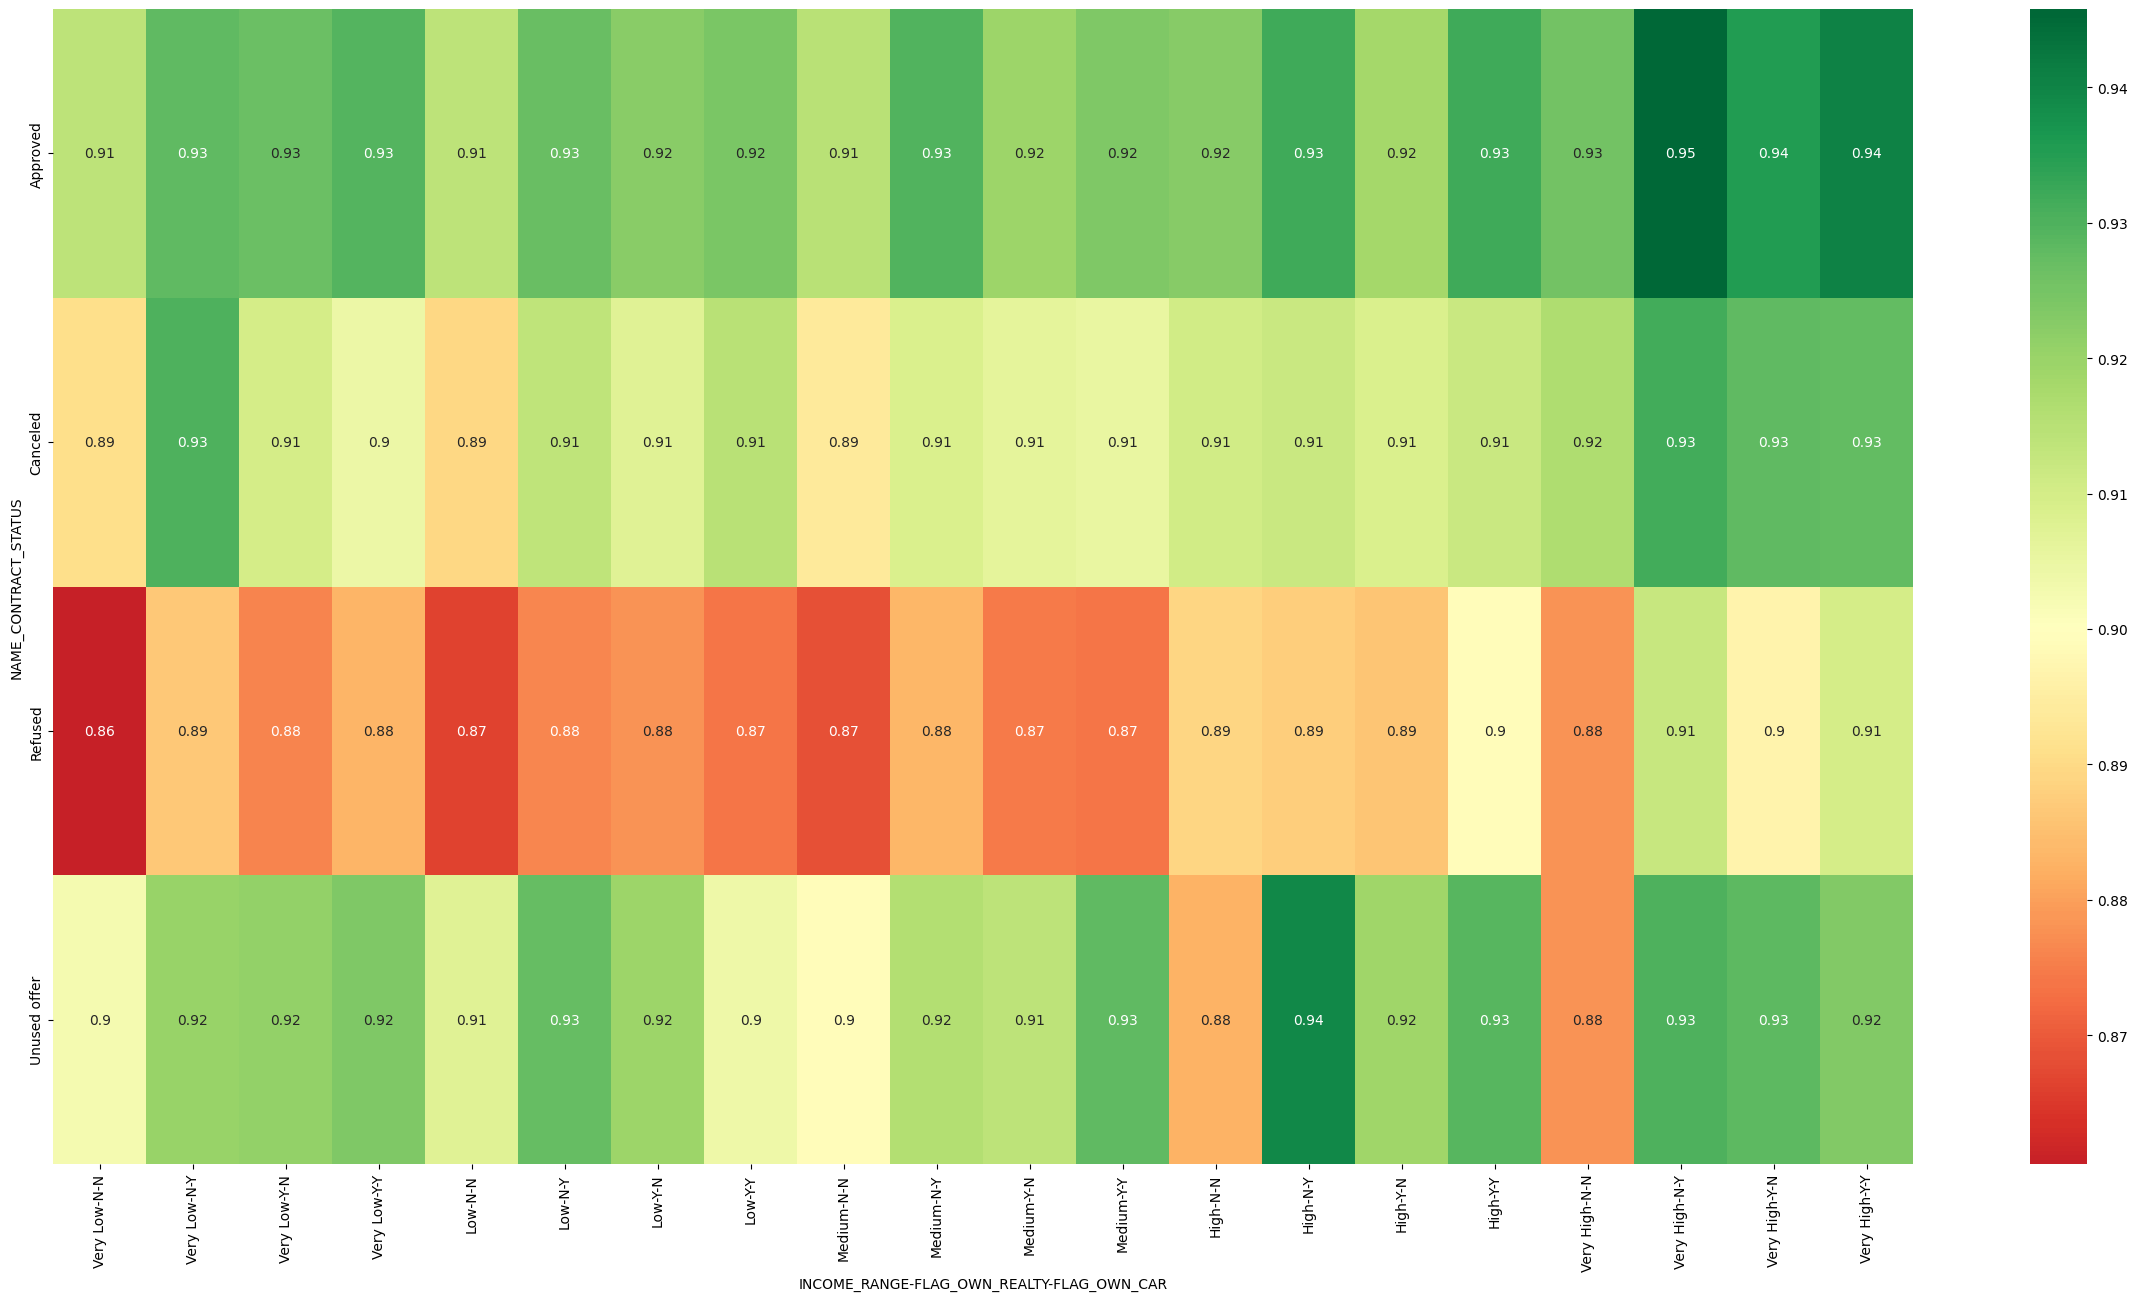

In [80]:
plt.figure(figsize=(30,15))
res3=pd.pivot_table(data=Merged,index=["NAME_CONTRACT_STATUS"],columns=["INCOME_RANGE","FLAG_OWN_REALTY","FLAG_OWN_CAR"],values="TARGET_FLAG")
sns.heatmap(res3,annot=True,cmap="RdYlGn",center=0.9)
# Avoid: 
#     Clients with salaries over  200K who did not own realty and car and whose past applications were either refused or unused
#     Clients in income range 150K-200K who did not own realty and car
# Target:
#     Very high income group 

<Axes: xlabel='INCOME_RANGE-FLAG_OWN_REALTY-FLAG_OWN_CAR', ylabel='Ext_Rating_3'>

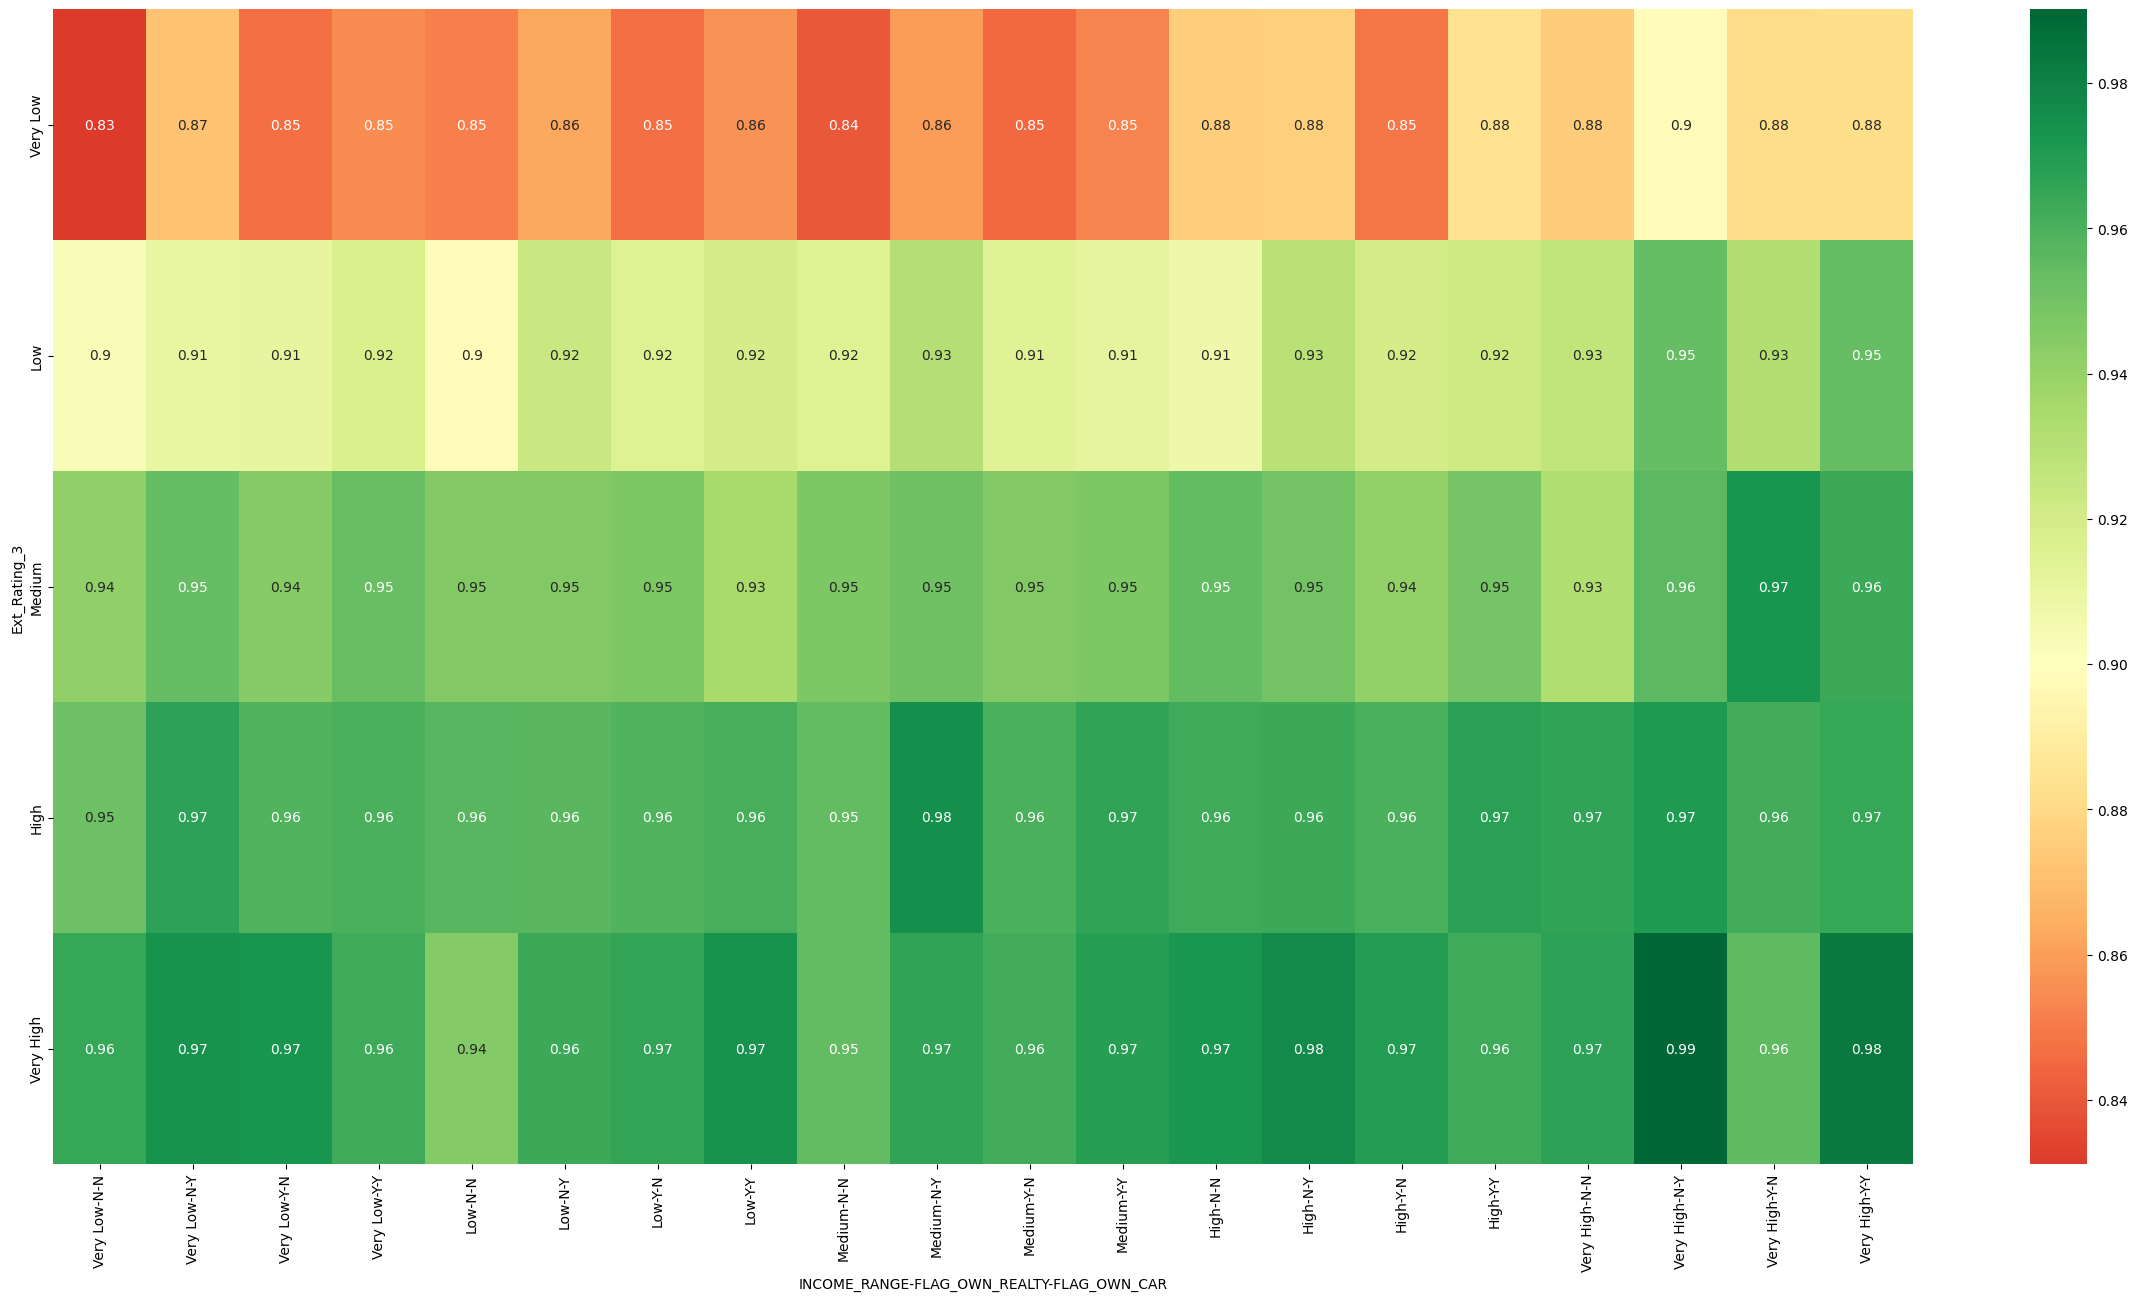

In [81]:
plt.figure(figsize=(30,15))
res3=pd.pivot_table(data=Merged,index=["Ext_Rating_3"],columns=["INCOME_RANGE","FLAG_OWN_REALTY","FLAG_OWN_CAR"],values="TARGET_FLAG")
sns.heatmap(res3,annot=True,cmap="RdYlGn",center=0.9)

# Quite evidently the client capability is striongly correlated to ext_source_3


<Axes: xlabel='AMT_CREDIT_APPLICATION_DIFF_RANGE', ylabel='NAME_CONTRACT_STATUS'>

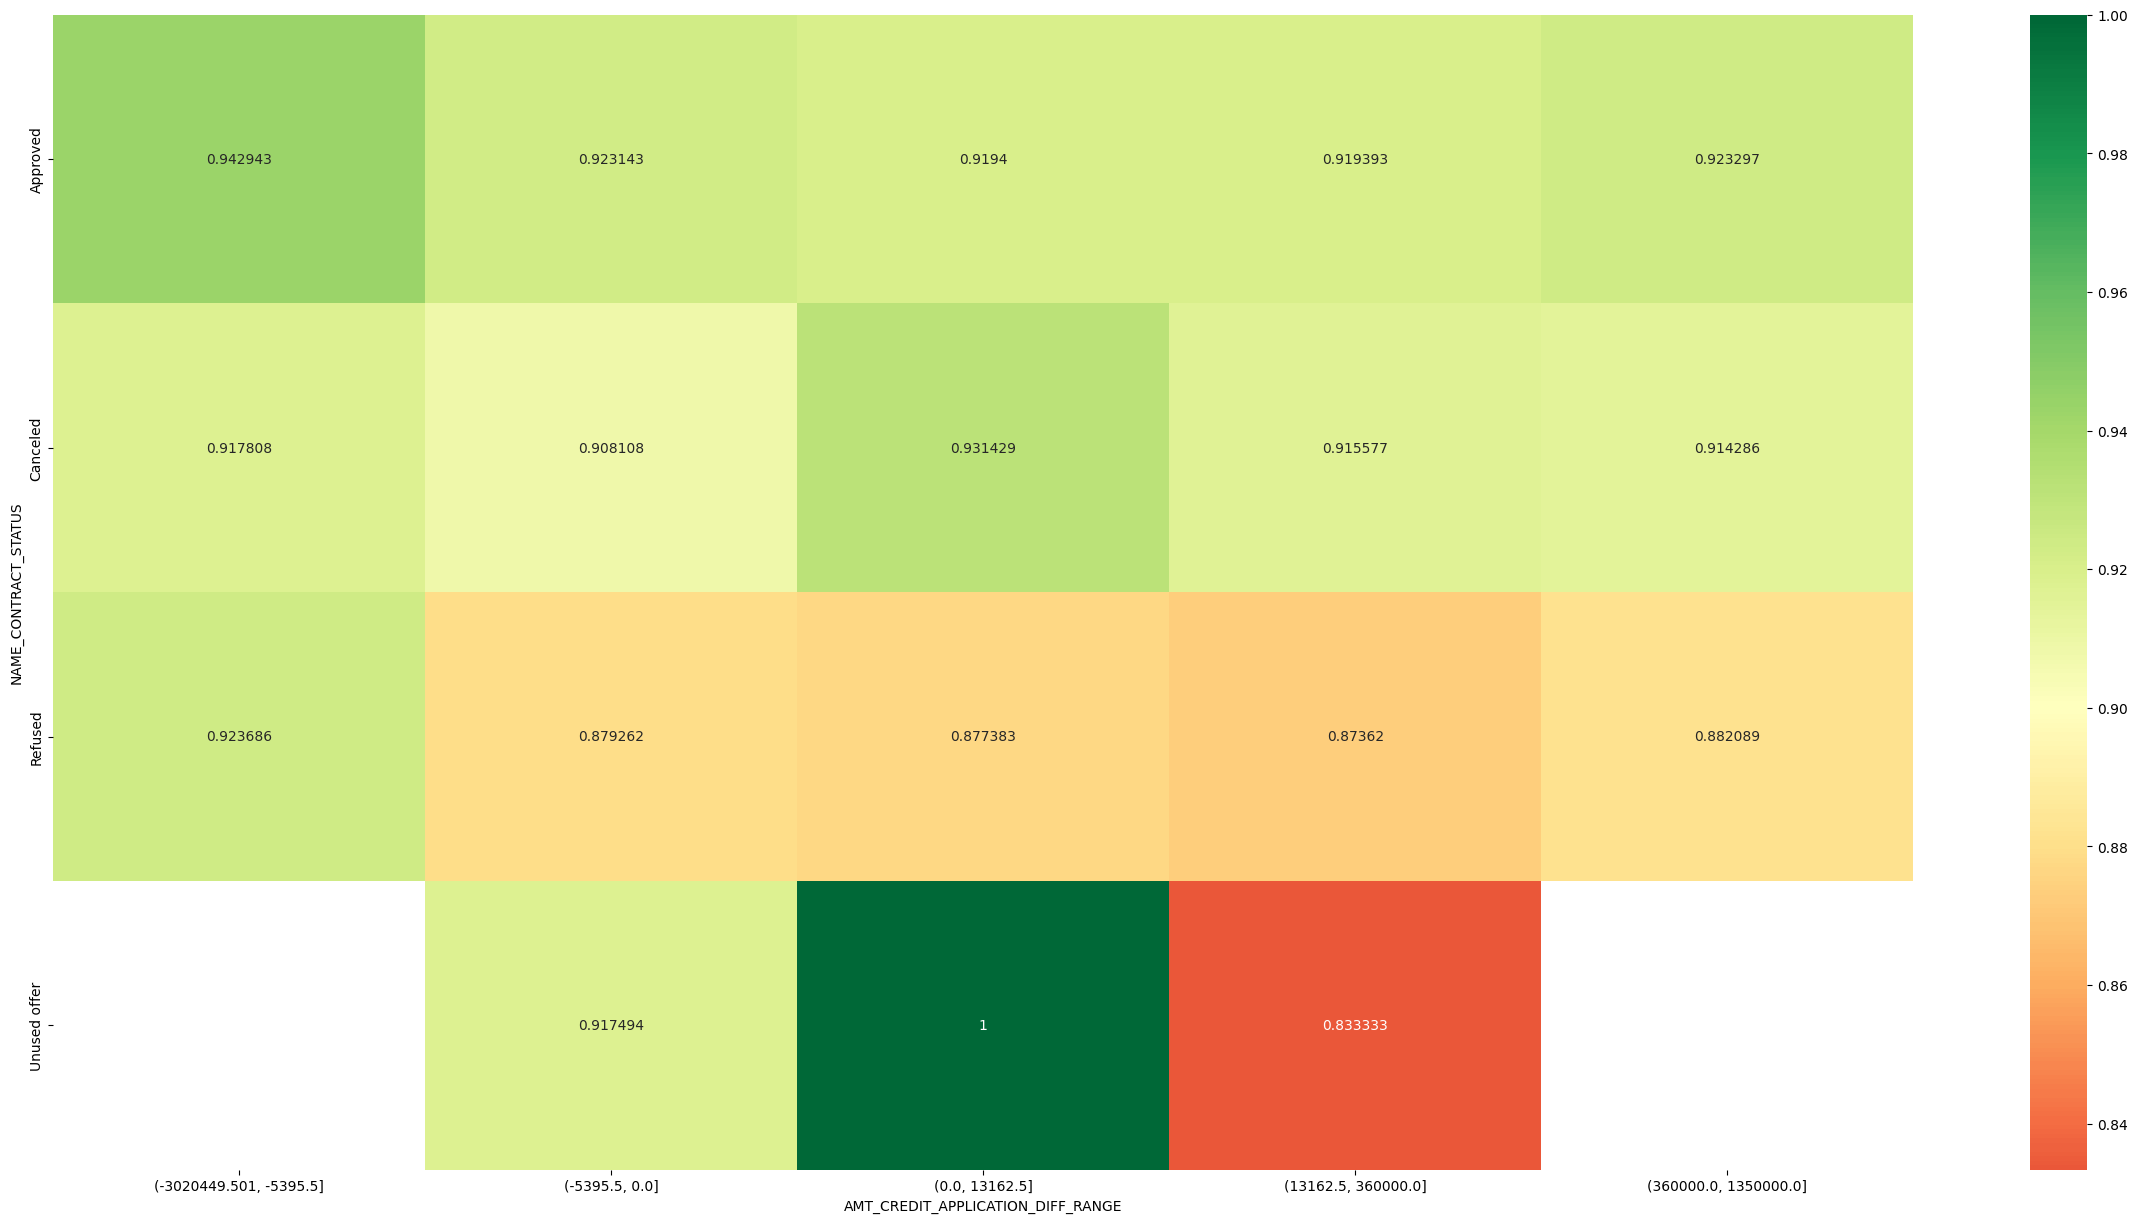

In [82]:
pd.options.display.float_format = '{:.2f}'.format
plt.figure(figsize=(30,15))
res=pd.pivot_table(data=Merged,index="NAME_CONTRACT_STATUS",columns=["AMT_CREDIT_APPLICATION_DIFF_RANGE"],values="TARGET_FLAG")
sns.heatmap(res,annot=True,cmap="RdYlGn",fmt="g",center=0.9)

# For applications wtith the Loan & credit amount more or less same, the default rate is 0 for previously unused offers

## Conclusion

In [83]:
# NAME_CONTRACT_STATUS, AGE_GROUP, EDUCATION_TYPE,CHANNEL_TYPE,INCOME_RANGE, EXT_RATING_3,YEARS_ID_PUBLISH are strong drivers
# to make a decision ont he loan status and also to apply any promotions

# Target:
# Senior clients with age over 50 
# Young clients(20-30) in very high income range whose applications were approved & unused in the past
# All clients with academic degree except married clients with unused offers
# Widows with incomplete higher education and unused offers
# Clients in a stable job for over 40 years
# Clients with credit amts upto 13K over application amount and unused offers in the past 
# as they are absolute non defaulters in the past

# Avoid:
# Very low income group clients whose applications were rejected in the past
# Married Clients with academic degree who had an unused offer in the past
# Lower secondary degree holders in civil marriage whose previous application was refused
# Clients who have been employed between 2-6 years
# Unused offers with that have very low credit amount than application amount in previous application

# Be Cautious with:
# Clients whose applications were rejected in the past
# Clients who recently got ID changed/New  - may be suspicious activity need to be cautious
# Clients living in low region rating
# AMT_Credit 3L-5L





# Car dealers, channel of corporate sales and contact center channels who are capable clients don’t have unused offers, meaning they are taking utilizing the loan offers. Bank needs to extrapolate the same strategy across other channels.
